# Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import pandas as pd
import random
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

# Replicating the given model

* Input shape: (2)
* Hidden layers: 5 layers with *relu* as activation function. Each layer has 6 neurons
* Output: since it is a binary classification function the output will be 1 with sigmoid as activation function
* Loss function: Binary Cross Entropy
* Optimizer: Adam
* Metrics: Accuracy

In [2]:
#Setting the random seed
tf.random.set_seed(42)

#Replicating the model
replicate_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer((2, )),
    tf.keras.layers.Dense(6, activation= 'relu'),
    tf.keras.layers.Dense(6, activation= 'relu'),
    tf.keras.layers.Dense(6, activation= 'relu'),
    tf.keras.layers.Dense(6, activation= 'relu'),
    tf.keras.layers.Dense(6, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

replicate_model.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

In [3]:
# Checking the summary of the model
replicate_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable pa

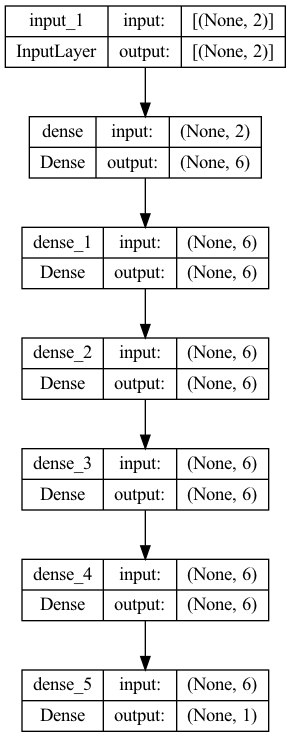

In [4]:
plot_model(replicate_model, show_shapes= True)

# Creating dataset for classifcation

In [5]:
X, y = make_moons(n_samples= 10000,
                  shuffle= True,
                  noise= 0.03,
                  random_state= 42)
X.shape, y.shape

((10000, 2), (10000,))

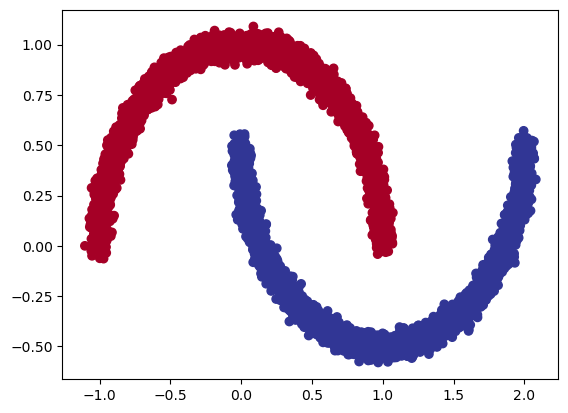

In [6]:
plt.scatter(X[:, 0], X[:, 1], c= y, cmap= plt.cm.RdYlBu)

# Creating a decision bounadry and confusion matrix function for easy visualisation of the model performance

In [7]:
def plot_decision_boundary(model, X, y):
    """
    PLots the decision boundary created by a model predicting on X.
    This function was inspired my two resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2. https://github.com/GokuMohandas/Made-With-ML
    """

    # Define the axis boundaries of the plot and create a meshgid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))
    
    #Create X values
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis= 1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap= plt.cm.RdYlBu, alpha= 0.8)
    plt.scatter(X[:, 0], X[:, 1], c= y, s= 40, cmap= plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [8]:
def plot_confusion_matrix(y_true, y_pred, classes= False, figsize= (10, 10), text_size= 15):
    '''
    Try it out by yourself by using y_true and y_pred as the parameters
    '''
    #Xreate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis= 1)[:, np.newaxis]
    n_classes = cm.shape[0]

    # Let's pretify it
    fig, ax = plt.subplots(figsize= figsize)

    cax = ax.matshow(cm, cmap= plt.cm.Blues)
    fig.colorbar(cax)

    #Create classes

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    #Label the axes
    ax.set(title= "Comnfusion Matrix",
        xlabel= "Predicted Label",
        ylabel= "True Label",
        xticks= np.arange(n_classes),
        yticks= np.arange(n_classes),
        xticklabels= labels,
        yticklabels= labels) 

    # Set axis labels to the bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    #Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    threshold = (cm.max() + cm.min()) / 2

    #Plot the tect on each cell
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
                horizontalalignment= "center", 
                color= "white" if cm[i, j] > threshold else "black",
                size= text_size)


# Splitting the data into training and test set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [10]:
#Checking the shape of the dataset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 2), (2000, 2), (8000,), (2000,))

# Creating model to classify the dataset

In [11]:
#Set the initial seed
tf.random.set_seed(42)

#Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

history_1 = model_1.fit(X_train, y_train,
            epochs= 100,
            validation_data= (X_test, y_test))

Epoch 1/100


  1/250 [..............................] - ETA: 36s - loss: 0.6375 - accuracy: 0.6875

2024-02-01 15:20:29.583927: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


250/250 [==============================] - 0s 665us/step - loss: 0.5654 - accuracy: 0.7010 - val_loss: 0.5252 - val_accuracy: 0.7130
Epoch 2/100
250/250 [==============================] - 0s 391us/step - loss: 0.5101 - accuracy: 0.7130 - val_loss: 0.4759 - val_accuracy: 0.7435
Epoch 3/100
250/250 [==============================] - 0s 382us/step - loss: 0.4714 - accuracy: 0.7340 - val_loss: 0.4403 - val_accuracy: 0.7685
Epoch 4/100
250/250 [==============================] - 0s 378us/step - loss: 0.4430 - accuracy: 0.7513 - val_loss: 0.4133 - val_accuracy: 0.7880
Epoch 5/100
250/250 [==============================] - 0s 378us/step - loss: 0.4209 - accuracy: 0.7649 - val_loss: 0.3919 - val_accuracy: 0.8010
Epoch 6/100
250/250 [==============================] - 0s 382us/step - loss: 0.4028 - accuracy: 0.7761 - val_loss: 0.3740 - val_accuracy: 0.8090
Epoch 7/100
250/250 [==============================] - 0s 385us/step - loss: 0.3874 - accuracy: 0.7876 - val_loss: 0.3586 - val_accuracy: 0.81

# Visualising the model performance

Graphs:
* Decision boundary
* Loss and Accuracy curve
* Confusion Matrix

## Decision Boundary

319/319 [==============================] - 0s 243us/step
doing binary classification


Text(0.5, 1.0, 'Model Prediction Decision boundary')

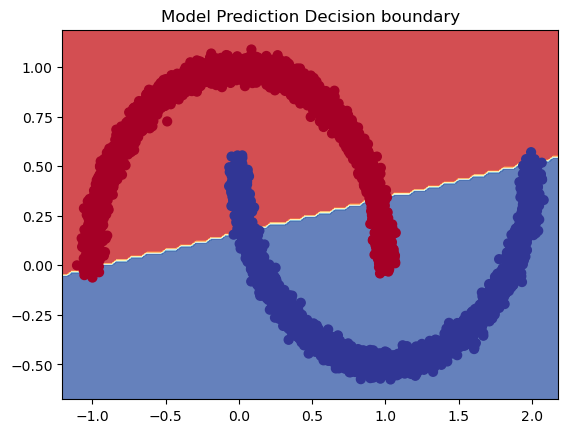

In [12]:
plot_decision_boundary(model= model_1,
                       X= X_train,
                       y= y_train)
plt.title("Model Prediction Decision boundary")

## Accuracy and loss curve

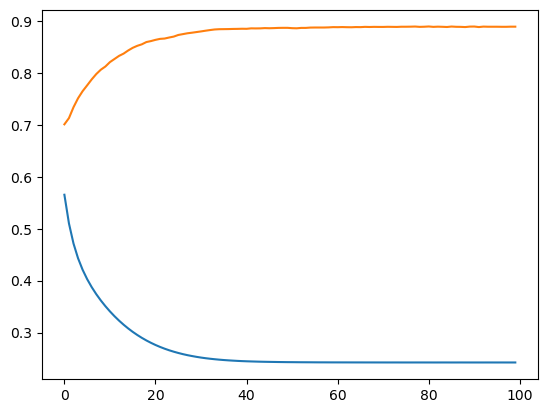

In [13]:
plt.plot(range(0, 100), history_1.history['loss'], label= 'Training loss Value')
plt.plot(range(0, 100), history_1.history['accuracy'], label= 'Training accuracy')


## Confusion Matrix

In [14]:
y_pred = model_1.predict(X_test)
tf.round(y_pred).shape, y_test.shape

 1/63 [..............................] - ETA: 0s

63/63 [==============================] - 0s 715us/step


(TensorShape([2000, 1]), (2000,))

In [15]:
tf.round(y_pred[0]), y_test[0]

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>, 1)

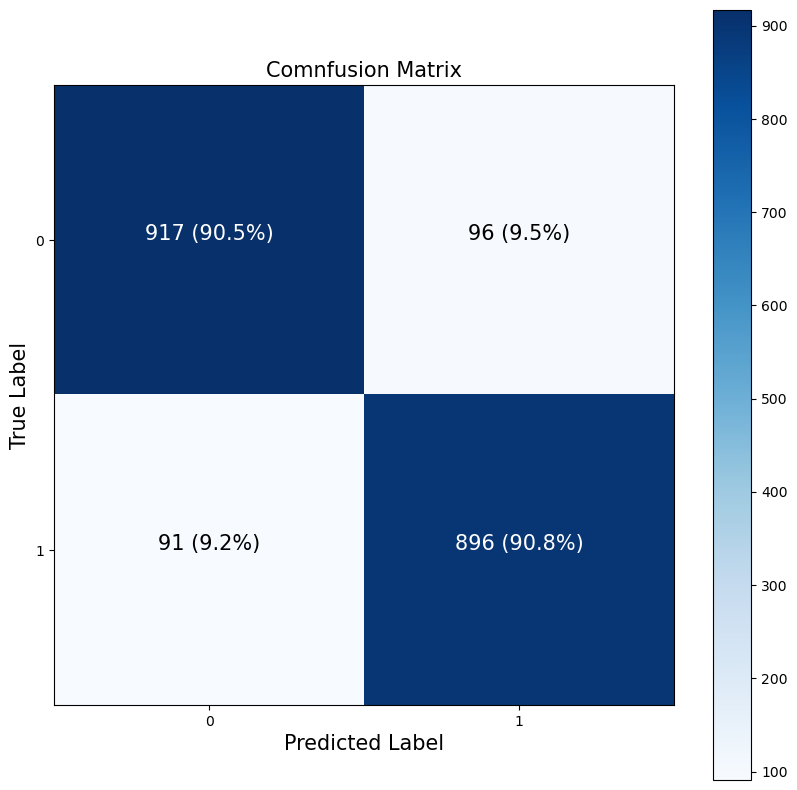

In [16]:
plot_confusion_matrix(y_test, tf.round(y_pred))

**Note**: Eventhough the training and testing accuracy is good but according to the decision boundary the model is not performing well

# Imporiving the model

Since our model is not performing in a non linear manner, we need to add some non linear activation function into our model.

Other improvements:
* Changing the learning rate
* Adding more layers
* Train for longer time

In [17]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_2.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

model_2.fit(X_train, y_train, epochs= 100)

Epoch 1/100
250/250 [==============================] - 0s 334us/step - loss: 0.6282 - accuracy: 0.6471
Epoch 2/100
250/250 [==============================] - 0s 285us/step - loss: 0.4885 - accuracy: 0.7635
Epoch 3/100
250/250 [==============================] - 0s 280us/step - loss: 0.4083 - accuracy: 0.7883
Epoch 4/100
250/250 [==============================] - 0s 277us/step - loss: 0.3595 - accuracy: 0.8139
Epoch 5/100
250/250 [==============================] - 0s 287us/step - loss: 0.3176 - accuracy: 0.8399
Epoch 6/100
250/250 [==============================] - 0s 285us/step - loss: 0.2708 - accuracy: 0.8649
Epoch 7/100
250/250 [==============================] - 0s 277us/step - loss: 0.2423 - accuracy: 0.8830
Epoch 8/100
250/250 [==============================] - 0s 279us/step - loss: 0.2256 - accuracy: 0.8928
Epoch 9/100
250/250 [==============================] - 0s 282us/step - loss: 0.2143 - accuracy: 0.9001
Epoch 10/100
250/250 [==============================] - 0s 277us/step - l

319/319 [==============================] - 0s 275us/step
doing binary classification


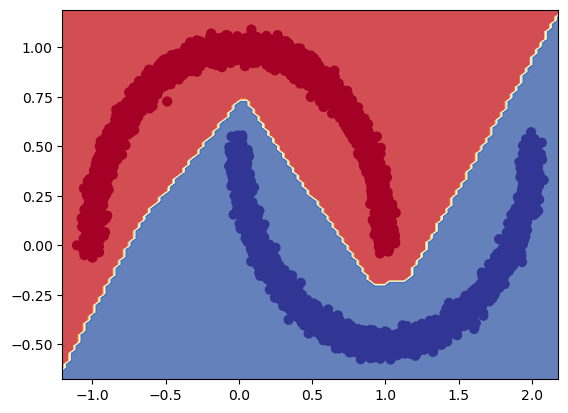

In [18]:
plot_decision_boundary(model= model_2,
                       X= X_train, 
                       y= y_train)

Add one more layer

In [19]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'relu'),
    tf.keras.layers.Dense(5, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_3.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

model_3.fit(X_train, y_train, epochs= 100)

Epoch 1/100
250/250 [==============================] - 0s 389us/step - loss: 0.6261 - accuracy: 0.7812
Epoch 2/100
250/250 [==============================] - 0s 293us/step - loss: 0.3857 - accuracy: 0.8425
Epoch 3/100
250/250 [==============================] - 0s 289us/step - loss: 0.2704 - accuracy: 0.8794
Epoch 4/100
250/250 [==============================] - 0s 294us/step - loss: 0.2271 - accuracy: 0.8965
Epoch 5/100
250/250 [==============================] - 0s 295us/step - loss: 0.2066 - accuracy: 0.8999
Epoch 6/100
250/250 [==============================] - 0s 290us/step - loss: 0.1913 - accuracy: 0.9099
Epoch 7/100
250/250 [==============================] - 0s 291us/step - loss: 0.1751 - accuracy: 0.9220
Epoch 8/100
250/250 [==============================] - 0s 292us/step - loss: 0.1576 - accuracy: 0.9293
Epoch 9/100
250/250 [==============================] - 0s 291us/step - loss: 0.1404 - accuracy: 0.9370
Epoch 10/100
250/250 [==============================] - 0s 291us/step - l

319/319 [==============================] - 0s 237us/step
doing binary classification


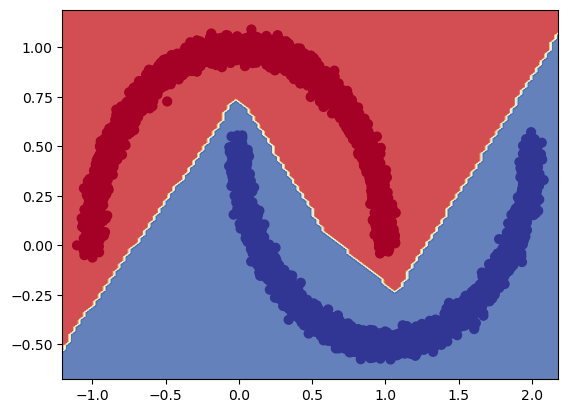

In [20]:
plot_decision_boundary(model_3, X_train, y_train)

Addition of another layer didn't help much to the model therefore removing the layer.

Will other activation function help?

In [21]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'tanh'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_4.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

history_4 = model_4.fit(X_train, y_train, epochs= 100, validation_data=(X_test, y_test))

Epoch 1/100
250/250 [==============================] - 0s 643us/step - loss: 0.5437 - accuracy: 0.7551 - val_loss: 0.4412 - val_accuracy: 0.8205
Epoch 2/100
250/250 [==============================] - 0s 393us/step - loss: 0.4124 - accuracy: 0.8155 - val_loss: 0.3563 - val_accuracy: 0.8525
Epoch 3/100
250/250 [==============================] - 0s 394us/step - loss: 0.3526 - accuracy: 0.8401 - val_loss: 0.3067 - val_accuracy: 0.8745
Epoch 4/100
250/250 [==============================] - 0s 388us/step - loss: 0.3137 - accuracy: 0.8586 - val_loss: 0.2729 - val_accuracy: 0.8850
Epoch 5/100
250/250 [==============================] - 0s 390us/step - loss: 0.2873 - accuracy: 0.8684 - val_loss: 0.2508 - val_accuracy: 0.8940
Epoch 6/100
250/250 [==============================] - 0s 389us/step - loss: 0.2708 - accuracy: 0.8794 - val_loss: 0.2372 - val_accuracy: 0.8980
Epoch 7/100
250/250 [==============================] - 0s 388us/step - loss: 0.2614 - accuracy: 0.8841 - val_loss: 0.2293 - val_ac

319/319 [==============================] - 0s 234us/step
doing binary classification


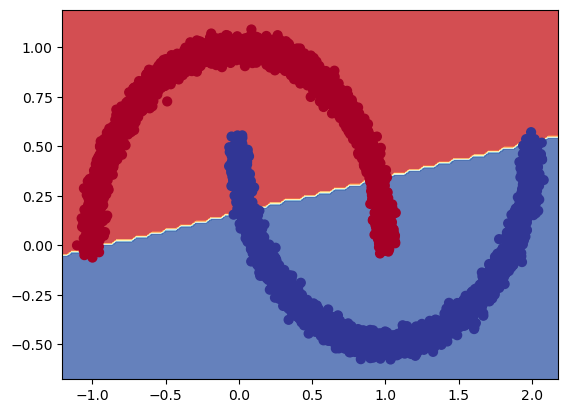

In [22]:
plot_decision_boundary(model_4, X_train, y_train)

The change in activation function helped a lot and is performing very well

Let's evaluate to other metrics also

 1/63 [..............................] - ETA: 0s

63/63 [==============================] - 0s 306us/step


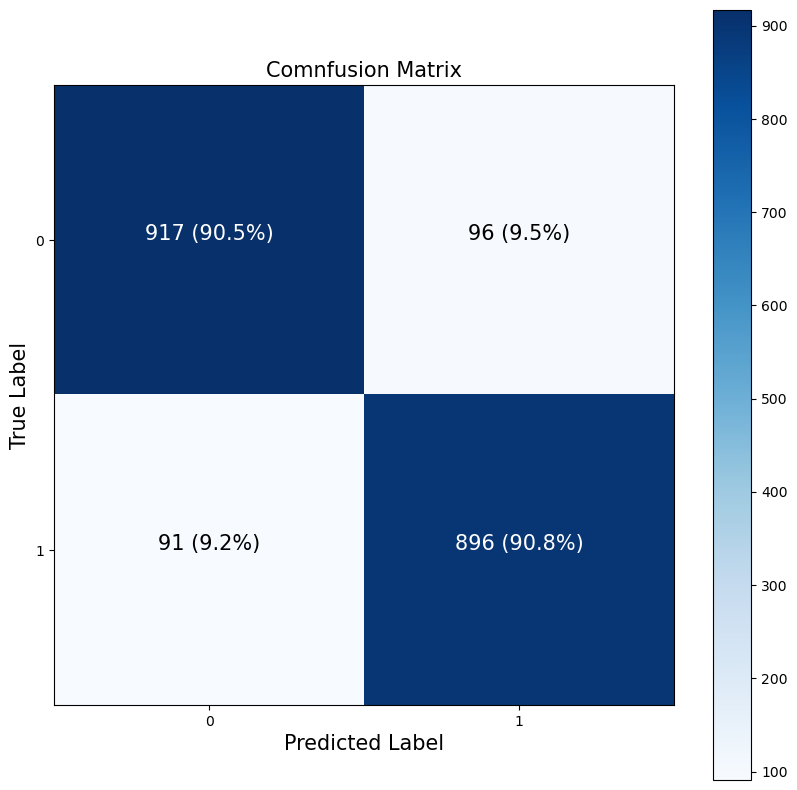

In [23]:
plot_confusion_matrix(y_test, 
                      tf.round(model_4.predict(X_test)))

According to the confusion matrix the model is performing outstanding.

Let's see if we can optimize the model by tweaking the learning rate

<Axes: >

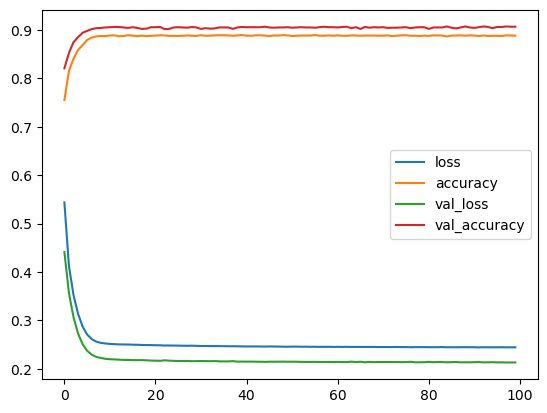

In [24]:
pd.DataFrame(history_4.history).plot()

## Looking for the optimal learning rate

In [25]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'tanh'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))

model_5.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

history_5 = model_5.fit(X_train, y_train, epochs= 100, validation_data= (X_test, y_test), callbacks= [lr_scheduler])

Epoch 1/100
250/250 [==============================] - 0s 650us/step - loss: 0.7479 - accuracy: 0.2225 - val_loss: 0.7293 - val_accuracy: 0.2250 - lr: 1.0000e-04
Epoch 2/100
250/250 [==============================] - 0s 395us/step - loss: 0.7087 - accuracy: 0.2559 - val_loss: 0.6885 - val_accuracy: 0.3305 - lr: 1.1220e-04
Epoch 3/100
250/250 [==============================] - 0s 396us/step - loss: 0.6697 - accuracy: 0.5416 - val_loss: 0.6483 - val_accuracy: 0.7230 - lr: 1.2589e-04
Epoch 4/100
250/250 [==============================] - 0s 387us/step - loss: 0.6319 - accuracy: 0.7295 - val_loss: 0.6092 - val_accuracy: 0.7680 - lr: 1.4125e-04
Epoch 5/100
250/250 [==============================] - 0s 388us/step - loss: 0.5955 - accuracy: 0.7536 - val_loss: 0.5719 - val_accuracy: 0.7830 - lr: 1.5849e-04
Epoch 6/100
250/250 [==============================] - 0s 389us/step - loss: 0.5610 - accuracy: 0.7646 - val_loss: 0.5364 - val_accuracy: 0.7960 - lr: 1.7783e-04
Epoch 7/100
250/250 [=======

Text(0.5, 1.0, 'Learning rate vs Loss Value')

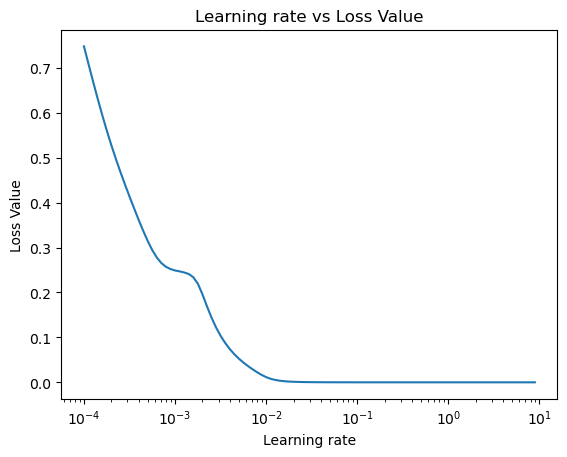

In [26]:
# Plot learning rate vs loss curve
lrs= history_5.history['lr']
plt.semilogx(lrs, history_5.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss Value')
plt.title("Learning rate vs Loss Value")

In [27]:
8e-4, 6e-3

(0.0008, 0.006)

Let's try for the above learning rate value and compare for 20 epochs

In [28]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'tanh'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_6.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(learning_rate= 8e-4),
                metrics= ['accuracy'])

history_6 = model_6.fit(X_train, y_train, epochs= 20, validation_data=(X_test, y_test))

Epoch 1/20


250/250 [==============================] - 0s 660us/step - loss: 0.4299 - accuracy: 0.8411 - val_loss: 0.3585 - val_accuracy: 0.8670
Epoch 2/20
250/250 [==============================] - 0s 398us/step - loss: 0.3411 - accuracy: 0.8533 - val_loss: 0.2900 - val_accuracy: 0.8810
Epoch 3/20
250/250 [==============================] - 0s 389us/step - loss: 0.2965 - accuracy: 0.8637 - val_loss: 0.2560 - val_accuracy: 0.8900
Epoch 4/20
250/250 [==============================] - 0s 393us/step - loss: 0.2735 - accuracy: 0.8737 - val_loss: 0.2380 - val_accuracy: 0.8955
Epoch 5/20
250/250 [==============================] - 0s 391us/step - loss: 0.2614 - accuracy: 0.8808 - val_loss: 0.2285 - val_accuracy: 0.9010
Epoch 6/20
250/250 [==============================] - 0s 394us/step - loss: 0.2551 - accuracy: 0.8856 - val_loss: 0.2234 - val_accuracy: 0.9025
Epoch 7/20
250/250 [==============================] - 0s 462us/step - loss: 0.2520 - accuracy: 0.8871 - val_loss: 0.2207 - val_accuracy: 0.9030
Epo

319/319 [==============================] - 0s 239us/step
doing binary classification
319/319 [==============================] - 0s 237us/step
doing binary classification


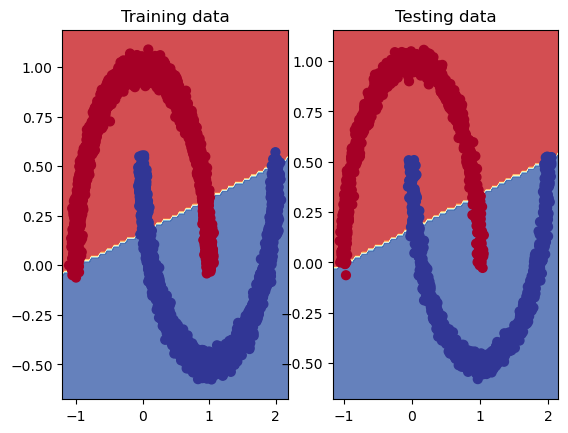

In [29]:
plt.subplot(1, 2, 1)
plt.title("Training data")
plot_decision_boundary(model_6, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing data")
plot_decision_boundary(model_6, X_test, y_test)

 1/63 [..............................] - ETA: 0s

63/63 [==============================] - 0s 506us/step


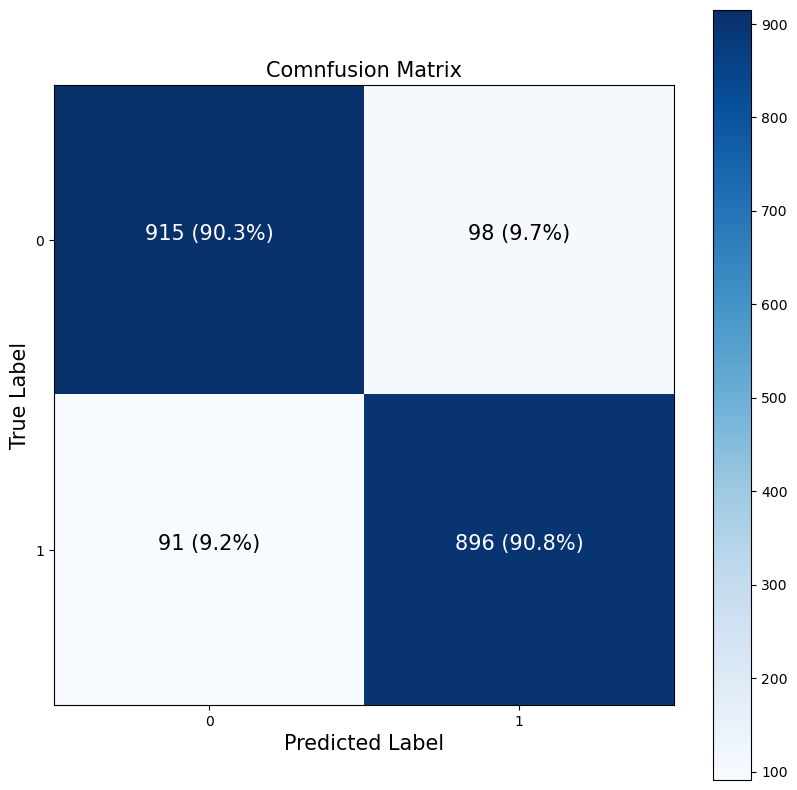

In [30]:
plot_confusion_matrix(y_test, tf.round(model_6.predict(X_test)))

The above learing rate was not at all good enough for faster output. Let's try the other one

In [31]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= 'tanh'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_7.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(learning_rate= 6e-3),
                metrics= ['accuracy'])

history_7 = model_7.fit(X_train, y_train, epochs= 20, validation_data=(X_test, y_test))

Epoch 1/20
250/250 [==============================] - 0s 651us/step - loss: 0.4233 - accuracy: 0.7563 - val_loss: 0.2532 - val_accuracy: 0.8945
Epoch 2/20
250/250 [==============================] - 0s 392us/step - loss: 0.2605 - accuracy: 0.8841 - val_loss: 0.2221 - val_accuracy: 0.9055
Epoch 3/20
250/250 [==============================] - 0s 388us/step - loss: 0.2499 - accuracy: 0.8876 - val_loss: 0.2157 - val_accuracy: 0.9020
Epoch 4/20
250/250 [==============================] - 0s 390us/step - loss: 0.2315 - accuracy: 0.8970 - val_loss: 0.1821 - val_accuracy: 0.9260
Epoch 5/20
250/250 [==============================] - 0s 389us/step - loss: 0.1810 - accuracy: 0.9200 - val_loss: 0.1357 - val_accuracy: 0.9425
Epoch 6/20
250/250 [==============================] - 0s 391us/step - loss: 0.1361 - accuracy: 0.9431 - val_loss: 0.1049 - val_accuracy: 0.9640
Epoch 7/20
250/250 [==============================] - 0s 389us/step - loss: 0.1065 - accuracy: 0.9604 - val_loss: 0.0833 - val_accuracy:

319/319 [==============================] - 0s 258us/step
doing binary classification
319/319 [==============================] - 0s 229us/step
doing binary classification


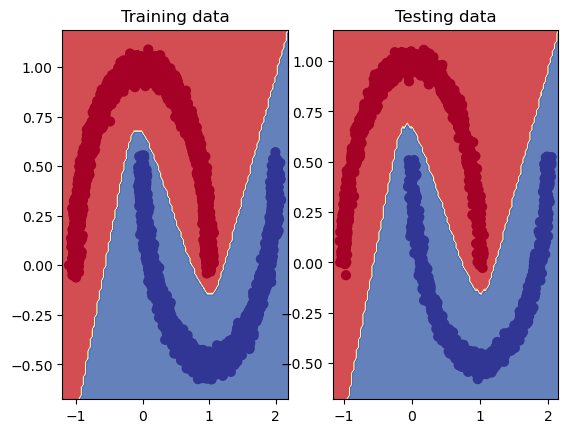

In [32]:
plt.subplot(1, 2, 1)
plt.title("Training data")
plot_decision_boundary(model_7, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing data")
plot_decision_boundary(model_7, X_test, y_test)

 1/63 [..............................] - ETA: 0s

63/63 [==============================] - 0s 276us/step


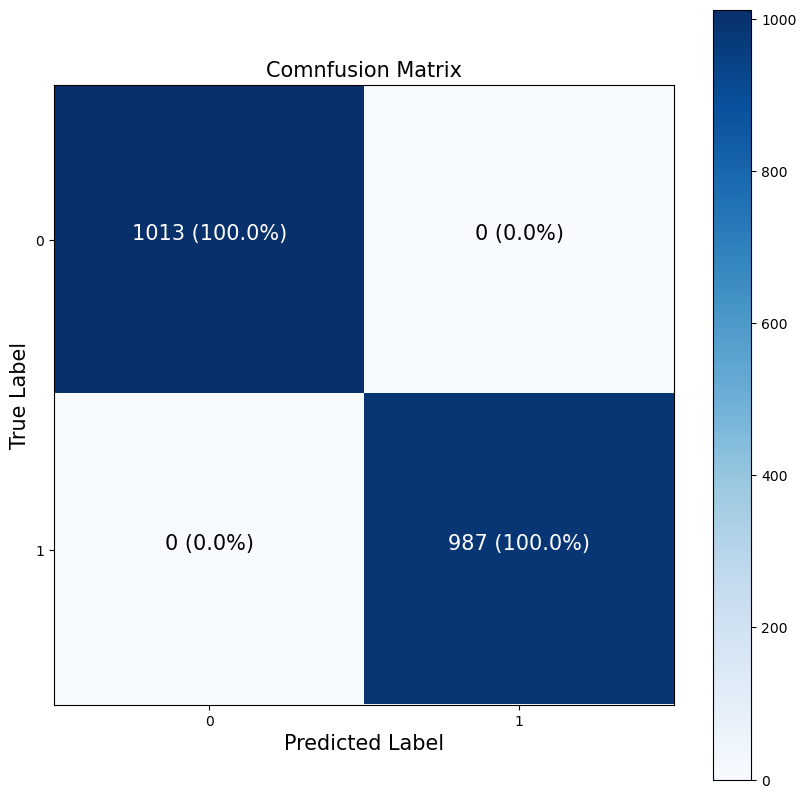

In [33]:
plot_confusion_matrix(y_test, tf.round(model_7.predict(X_test)))

From the above experiments, we can conclude that `model_4` has performed the best

319/319 [==============================] - 0s 243us/step
doing binary classification
319/319 [==============================] - 0s 230us/step
doing binary classification


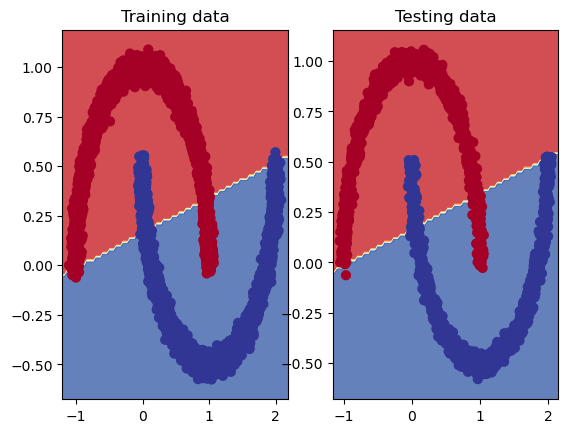

In [34]:
plt.subplot(1, 2, 1)
plt.title("Training data")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing data")
plot_decision_boundary(model_4, X_test, y_test)

 1/63 [..............................] - ETA: 0s

63/63 [==============================] - 0s 283us/step


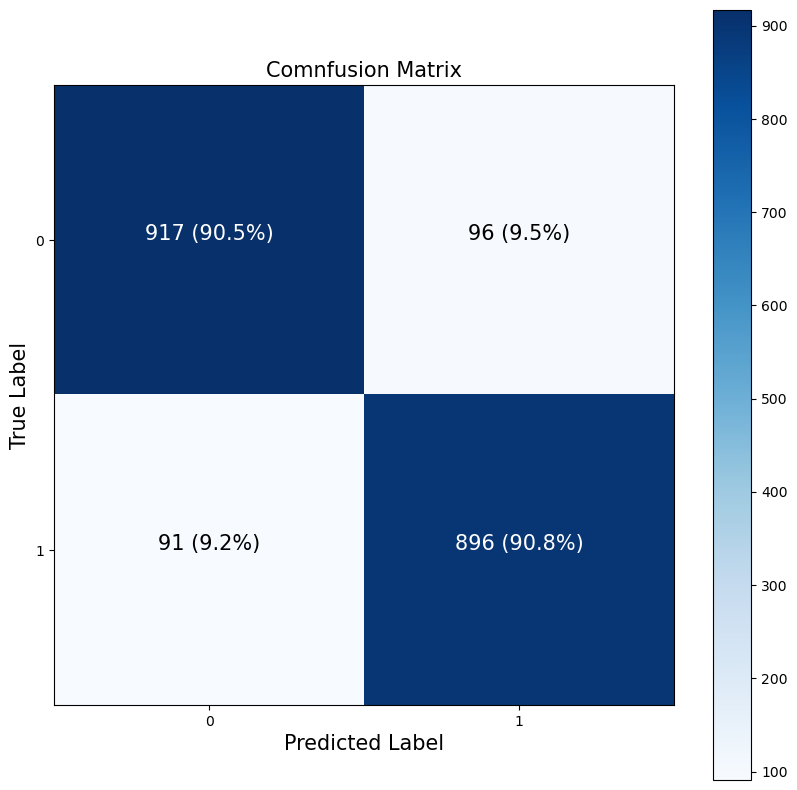

In [35]:
plot_confusion_matrix(y_test, tf.round(model_4.predict(X_test)))

In [36]:
X_test

array([[ 0.8141004 , -0.51346939],
       [ 1.49960073, -0.34049139],
       [-0.9829114 ,  0.24391071],
       ...,
       [ 0.5114129 ,  0.86143247],
       [-0.15628843,  1.00866236],
       [-0.35473776,  0.88803656]])

In [37]:
model_4.evaluate(X_test, y_test)

 1/63 [..............................] - ETA: 2s - loss: 0.2602 - accuracy: 0.9062

63/63 [==============================] - 0s 780us/step - loss: 0.2132 - accuracy: 0.9065


[0.21316207945346832, 0.906499981880188]

# Making a Classification model for Fashion MNISt Dataset

## Loading the data

In [38]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [39]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [40]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [41]:
# Plotting random images from the dataset to analyse
def plot_random_images():
    plt.figure(figsize= (10, 7))

    rand_idx = [random.randrange(0, train_data.shape[0]) for _ in range(6)]
    for i in range(6):
        ax = plt.subplot(2, 3, 1 + i)
        plt.imshow(train_data[rand_idx[i]], cmap= plt.cm.binary)
        plt.title(class_names[train_labels[rand_idx[i]]])
        plt.axis(False)
        

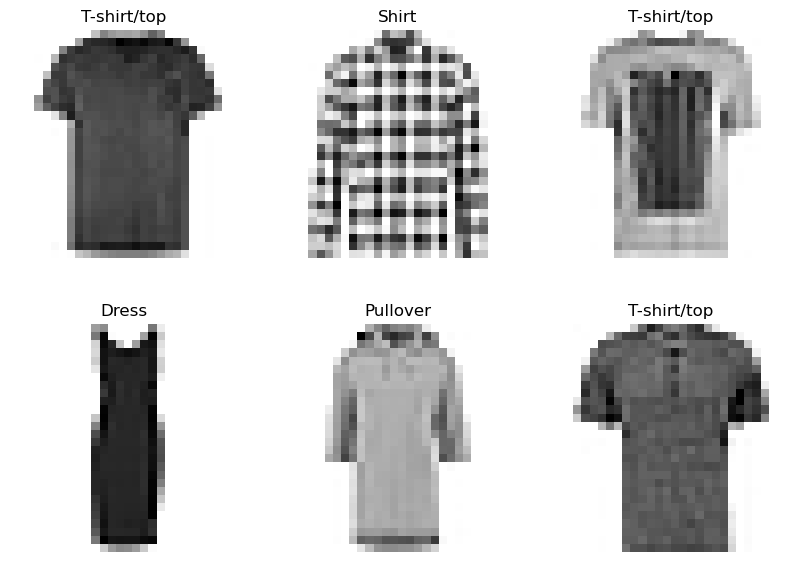

In [42]:
plot_random_images()

In [43]:
## Creating a basic model without any normalisation

tf.random.set_seed(42)

fashion_model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_1.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_1 = fashion_model_1.fit(train_data, train_labels,
                                        epochs= 10,
                                        validation_data= (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 372us/step - loss: 16.6715 - accuracy: 0.7457 - val_loss: 14.2976 - val_accuracy: 0.7707
Epoch 2/10
1875/1875 [==============================] - 1s 337us/step - loss: 12.6145 - accuracy: 0.7871 - val_loss: 18.6558 - val_accuracy: 0.7513
Epoch 3/10
1875/1875 [==============================] - 1s 335us/step - loss: 11.6401 - accuracy: 0.7968 - val_loss: 10.3699 - val_accuracy: 0.7922
Epoch 4/10
1875/1875 [==============================] - 1s 335us/step - loss: 10.8079 - accuracy: 0.7980 - val_loss: 12.4878 - val_accuracy: 0.7890
Epoch 5/10
1875/1875 [==============================] - 1s 334us/step - loss: 10.4060 - accuracy: 0.8015 - val_loss: 12.7405 - val_accuracy: 0.7577
Epoch 6/10
1875/1875 [==============================] - 1s 334us/step - loss: 10.0663 - accuracy: 0.8056 - val_loss: 10.4692 - val_accuracy: 0.7947
Epoch 7/10
1875/1875 [==============================] - 1s 334us/step - loss: 10.5908 - accuracy: 0.8025 - val_l

## Visualisation of the model performance

Since this is an image classification model, we have to think of other avalable visualisation and evaluation metrics, such as:
* Confusion Matrix
* Accuracy and Loss Curve
* Learning rate vs Loss

In [44]:
tf.argmax(fashion_model_1.predict(test_data), axis= 1).shape, test_labels.shape

313/313 [==============================] - 0s 257us/step


(TensorShape([10000]), (10000,))

  1/313 [..............................] - ETA: 2s

313/313 [==============================] - 0s 267us/step


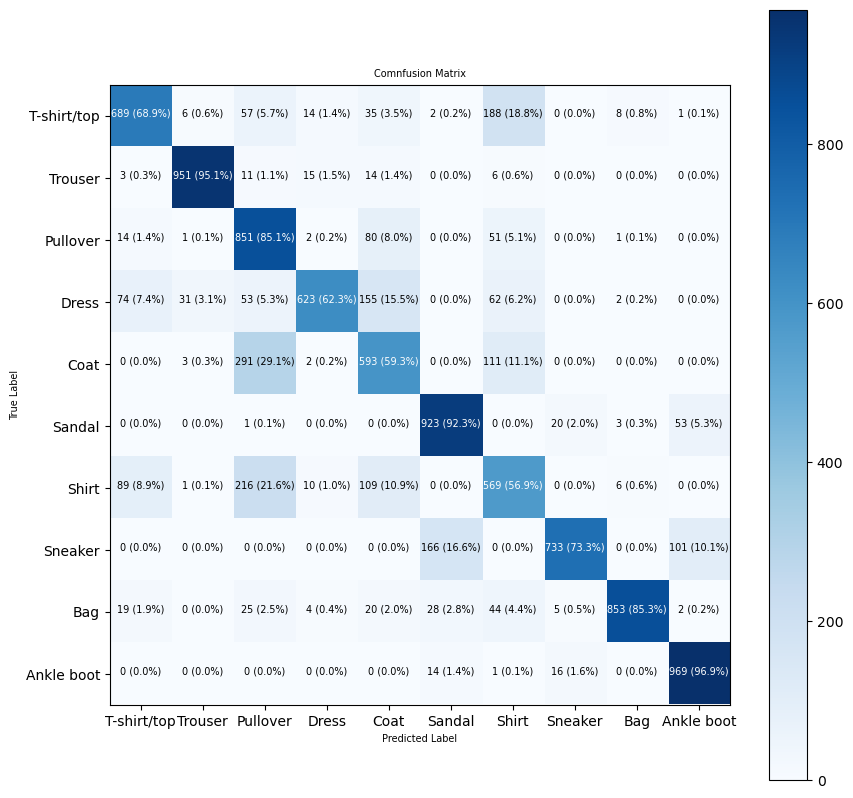

In [45]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_1.predict(test_data), axis= 1),
                      classes= class_names,
                      text_size= 7)

Since the Confusion Matrix is very poor we are skipping the other visual aspects and moving on

In [46]:
tf.random.set_seed(42)

fashion_model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= train_data.shape[1: ]),
    tf.keras.layers.Dense(10, activation= 'relu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_2.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_model_2.fit(train_data, train_labels,
                    epochs= 10,
                    validation_data= (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 393us/step - loss: 2.4466 - accuracy: 0.1328 - val_loss: 2.1593 - val_accuracy: 0.1597
Epoch 2/10
1875/1875 [==============================] - 1s 356us/step - loss: 2.0984 - accuracy: 0.1842 - val_loss: 1.9955 - val_accuracy: 0.2114
Epoch 3/10
1875/1875 [==============================] - 1s 357us/step - loss: 1.9949 - accuracy: 0.2172 - val_loss: 1.9408 - val_accuracy: 0.2349
Epoch 4/10
1875/1875 [==============================] - 1s 368us/step - loss: 1.7479 - accuracy: 0.2736 - val_loss: 1.7745 - val_accuracy: 0.2792
Epoch 5/10
1875/1875 [==============================] - 1s 357us/step - loss: 1.6868 - accuracy: 0.2783 - val_loss: 1.6995 - val_accuracy: 0.2992
Epoch 6/10
1875/1875 [==============================] - 1s 360us/step - loss: 1.6573 - accuracy: 0.2819 - val_loss: 1.6496 - val_accuracy: 0.3012
Epoch 7/10
1875/1875 [==============================] - 1s 359us/step - loss: 1.6420 - accuracy: 0.2881 - val_loss: 1.6219 -

313/313 [==============================] - 0s 261us/step


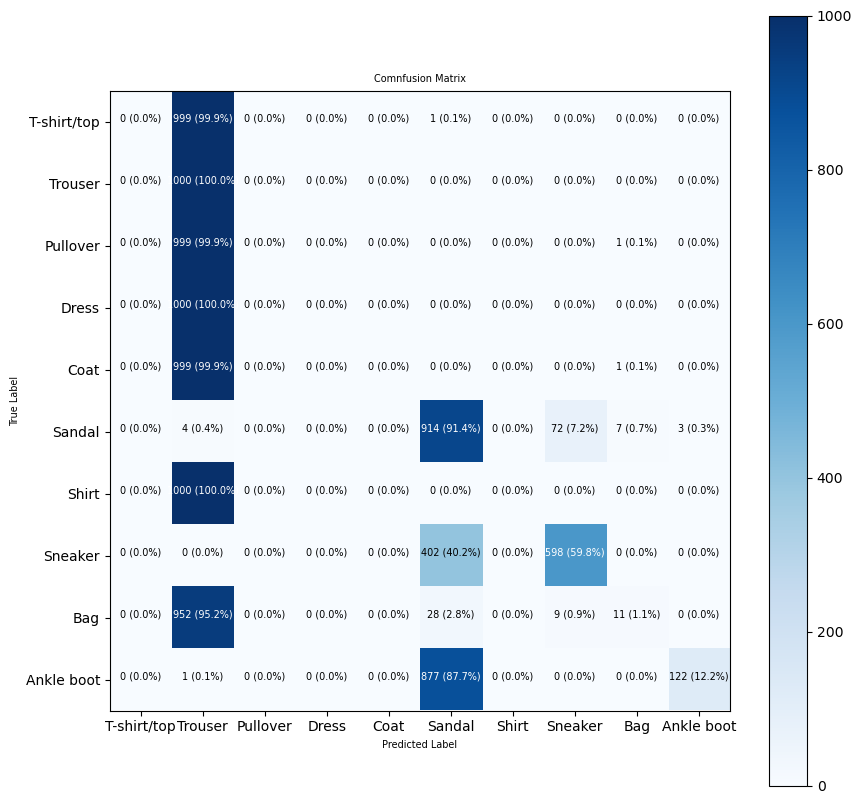

In [47]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_2.predict(test_data), axis= 1),
                      classes= class_names,
                      text_size= 7)

In [48]:
tf.random.set_seed(42)

fashion_model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= train_data.shape[1: ]),
    tf.keras.layers.Dense(10, activation= tf.keras.activations.swish),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_3.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_model_3.fit(train_data, train_labels,
                    epochs= 10,
                    validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 399us/step - loss: 2.7523 - accuracy: 0.1615 - val_loss: 1.9977 - val_accuracy: 0.2414
Epoch 2/10
1875/1875 [==============================] - 1s 373us/step - loss: 1.8581 - accuracy: 0.2580 - val_loss: 1.7455 - val_accuracy: 0.2966
Epoch 3/10
1875/1875 [==============================] - 1s 360us/step - loss: 1.6887 - accuracy: 0.2865 - val_loss: 1.6155 - val_accuracy: 0.3068
Epoch 4/10
1875/1875 [==============================] - 1s 360us/step - loss: 1.6412 - accuracy: 0.3000 - val_loss: 1.6089 - val_accuracy: 0.3050
Epoch 5/10
1875/1875 [==============================] - 1s 361us/step - loss: 1.5780 - accuracy: 0.3235 - val_loss: 1.5429 - val_accuracy: 0.3355
Epoch 6/10
1875/1875 [==============================] - 1s 361us/step - loss: 1.5300 - accuracy: 0.3511 - val_loss: 1.5443 - val_accuracy: 0.3594
Epoch 7/10
1875/1875 [==============================] - 1s 360us/step - loss: 1.4971 - accuracy: 0.3633 - val_loss: 1.4875 -

313/313 [==============================] - 0s 265us/step


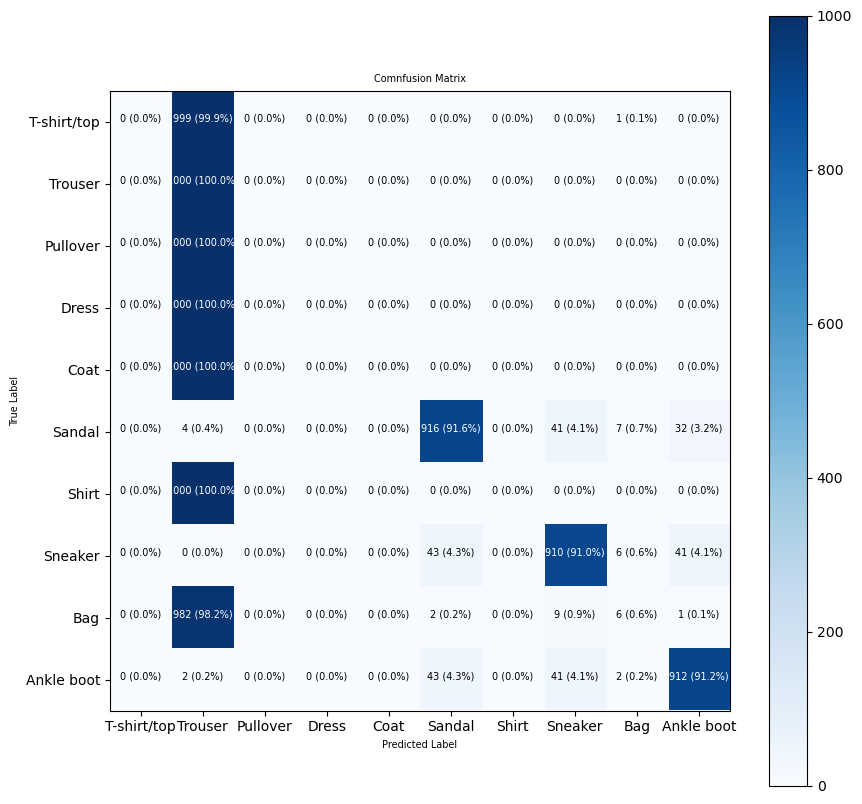

In [49]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_3.predict(test_data), axis= 1),
                      classes= class_names,
                      text_size= 7)

In [50]:
tf.random.set_seed(42)

fashion_model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_4.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_4 = fashion_model_4.fit(train_data, train_labels,
                                        epochs= 100,
                                        validation_data= (test_data, test_labels))

Epoch 1/100
1875/1875 [==============================] - 1s 376us/step - loss: 16.6198 - accuracy: 0.7453 - val_loss: 14.9860 - val_accuracy: 0.7487
Epoch 2/100
1875/1875 [==============================] - 1s 354us/step - loss: 12.3634 - accuracy: 0.7897 - val_loss: 16.8464 - val_accuracy: 0.7701
Epoch 3/100
1875/1875 [==============================] - 1s 341us/step - loss: 11.3001 - accuracy: 0.7978 - val_loss: 10.9052 - val_accuracy: 0.7925
Epoch 4/100
1875/1875 [==============================] - 1s 340us/step - loss: 10.4785 - accuracy: 0.8001 - val_loss: 12.6320 - val_accuracy: 0.7891
Epoch 5/100
1875/1875 [==============================] - 1s 337us/step - loss: 10.6050 - accuracy: 0.8008 - val_loss: 9.8926 - val_accuracy: 0.7961
Epoch 6/100
1875/1875 [==============================] - 1s 335us/step - loss: 10.3372 - accuracy: 0.8036 - val_loss: 16.6921 - val_accuracy: 0.7427
Epoch 7/100
1875/1875 [==============================] - 1s 342us/step - loss: 10.4509 - accuracy: 0.8054 -

313/313 [==============================] - 0s 264us/step


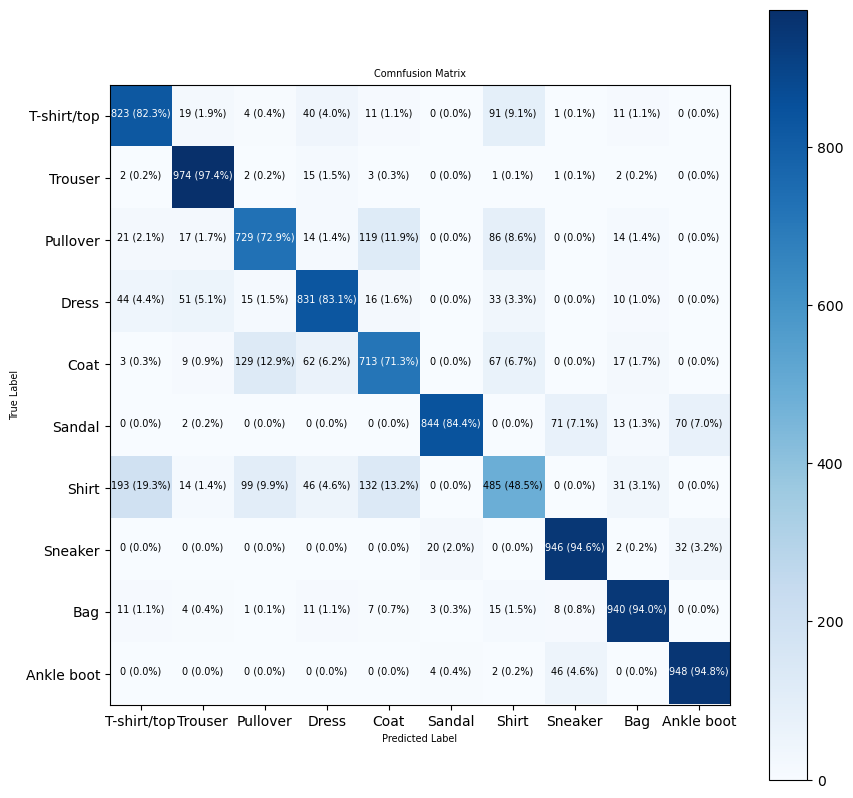

In [51]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_4.predict(test_data), axis= 1),
                      classes= class_names,
                      text_size= 7)

In [52]:
fashion_model_4.evaluate(test_data, test_labels)

  1/313 [..............................] - ETA: 3s - loss: 2.3304 - accuracy: 0.9375

313/313 [==============================] - 0s 312us/step - loss: 11.1867 - accuracy: 0.8233


[11.186742782592773, 0.8233000040054321]

In [53]:
tf.random.set_seed(42)

fashion_model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_5.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_5 = fashion_model_5.fit(train_data, train_labels,
                                        epochs= 100,
                                        validation_data= (test_data, test_labels))

Epoch 1/100
1875/1875 [==============================] - 1s 396us/step - loss: 9.7979 - accuracy: 0.6802 - val_loss: 2.1406 - val_accuracy: 0.7579
Epoch 2/100
1875/1875 [==============================] - 1s 347us/step - loss: 1.1503 - accuracy: 0.7657 - val_loss: 0.7858 - val_accuracy: 0.7750
Epoch 3/100
1875/1875 [==============================] - 1s 345us/step - loss: 0.6710 - accuracy: 0.7941 - val_loss: 0.6693 - val_accuracy: 0.7882
Epoch 4/100
1875/1875 [==============================] - 1s 348us/step - loss: 0.6775 - accuracy: 0.7989 - val_loss: 0.7248 - val_accuracy: 0.7966
Epoch 5/100
1875/1875 [==============================] - 1s 346us/step - loss: 0.6724 - accuracy: 0.8012 - val_loss: 0.6442 - val_accuracy: 0.8026
Epoch 6/100
1875/1875 [==============================] - 1s 350us/step - loss: 0.6441 - accuracy: 0.8089 - val_loss: 0.7183 - val_accuracy: 0.7844
Epoch 7/100
1875/1875 [==============================] - 1s 358us/step - loss: 0.6167 - accuracy: 0.8086 - val_loss: 0

313/313 [==============================] - 0s 262us/step


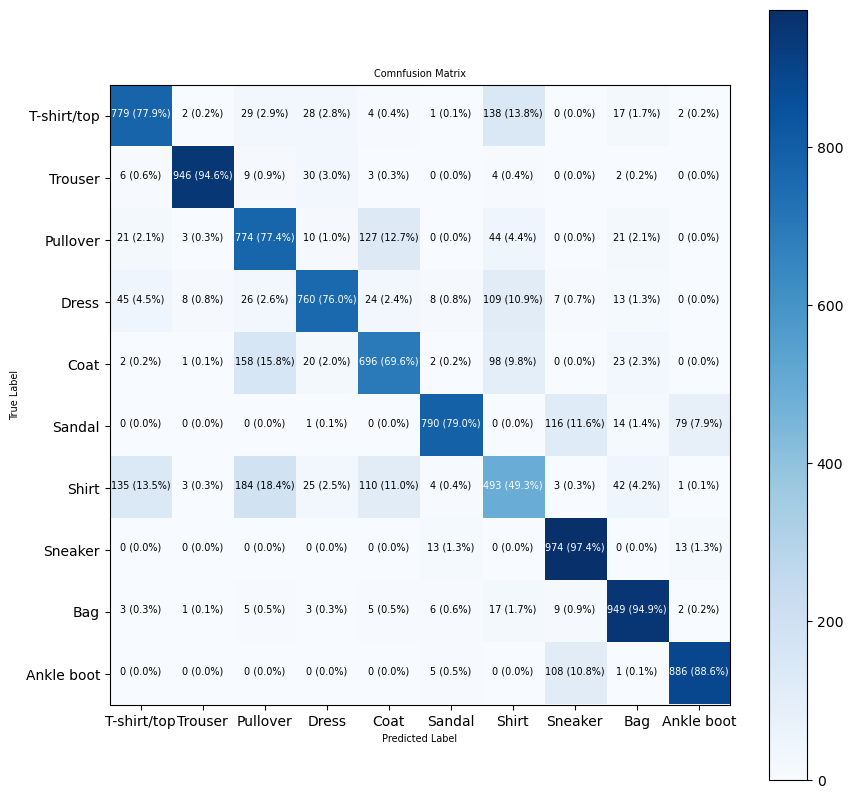

In [54]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_5.predict(test_data), axis= 1),
                      classes= class_names,
                      text_size= 7)

In [55]:
tf.random.set_seed(42)

fashion_model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(5, activation= 'elu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_6.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_6 = fashion_model_6.fit(train_data, train_labels,
                                        epochs= 100,
                                        validation_data= (test_data, test_labels))

Epoch 1/100
1875/1875 [==============================] - 1s 387us/step - loss: 2.4715 - accuracy: 0.1179 - val_loss: 2.2399 - val_accuracy: 0.1268
Epoch 2/100
1875/1875 [==============================] - 1s 349us/step - loss: 2.1880 - accuracy: 0.1506 - val_loss: 2.1475 - val_accuracy: 0.1768
Epoch 3/100
1875/1875 [==============================] - 1s 349us/step - loss: 1.8726 - accuracy: 0.2188 - val_loss: 1.7583 - val_accuracy: 0.2551
Epoch 4/100
1875/1875 [==============================] - 1s 348us/step - loss: 1.6703 - accuracy: 0.2794 - val_loss: 1.6354 - val_accuracy: 0.2886
Epoch 5/100
1875/1875 [==============================] - 1s 349us/step - loss: 1.6267 - accuracy: 0.2859 - val_loss: 1.6158 - val_accuracy: 0.2934
Epoch 6/100
1875/1875 [==============================] - 1s 359us/step - loss: 1.6115 - accuracy: 0.2840 - val_loss: 1.5982 - val_accuracy: 0.2761
Epoch 7/100
1875/1875 [==============================] - 1s 350us/step - loss: 1.6031 - accuracy: 0.2802 - val_loss: 1

## Imporving the model

Ways to improve the model:
* Normalise the test_data
* Add layers
* Change learning rate
* Train more

In [56]:
tf.reduce_max(train_data).numpy()

255

In [57]:
# Normalising the data

train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [58]:
tf.random.set_seed(42)

fashion_model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(5, activation= 'elu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_7.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_7 = fashion_model_7.fit(train_data_norm, train_labels,
                                        epochs= 100,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/100
1875/1875 [==============================] - 1s 382us/step - loss: 0.8065 - accuracy: 0.7395 - val_loss: 0.6042 - val_accuracy: 0.7989
Epoch 2/100
1875/1875 [==============================] - 1s 350us/step - loss: 0.5515 - accuracy: 0.8124 - val_loss: 0.5948 - val_accuracy: 0.7979
Epoch 3/100
1875/1875 [==============================] - 1s 348us/step - loss: 0.5128 - accuracy: 0.8229 - val_loss: 0.5326 - val_accuracy: 0.8120
Epoch 4/100
1875/1875 [==============================] - 1s 348us/step - loss: 0.4922 - accuracy: 0.8302 - val_loss: 0.5160 - val_accuracy: 0.8198
Epoch 5/100
1875/1875 [==============================] - 1s 346us/step - loss: 0.4818 - accuracy: 0.8336 - val_loss: 0.5193 - val_accuracy: 0.8170
Epoch 6/100
1875/1875 [==============================] - 1s 366us/step - loss: 0.4705 - accuracy: 0.8372 - val_loss: 0.5084 - val_accuracy: 0.8235
Epoch 7/100
1875/1875 [==============================] - 1s 348us/step - loss: 0.4633 - accuracy: 0.8385 - val_loss: 0

313/313 [==============================] - 0s 216us/step


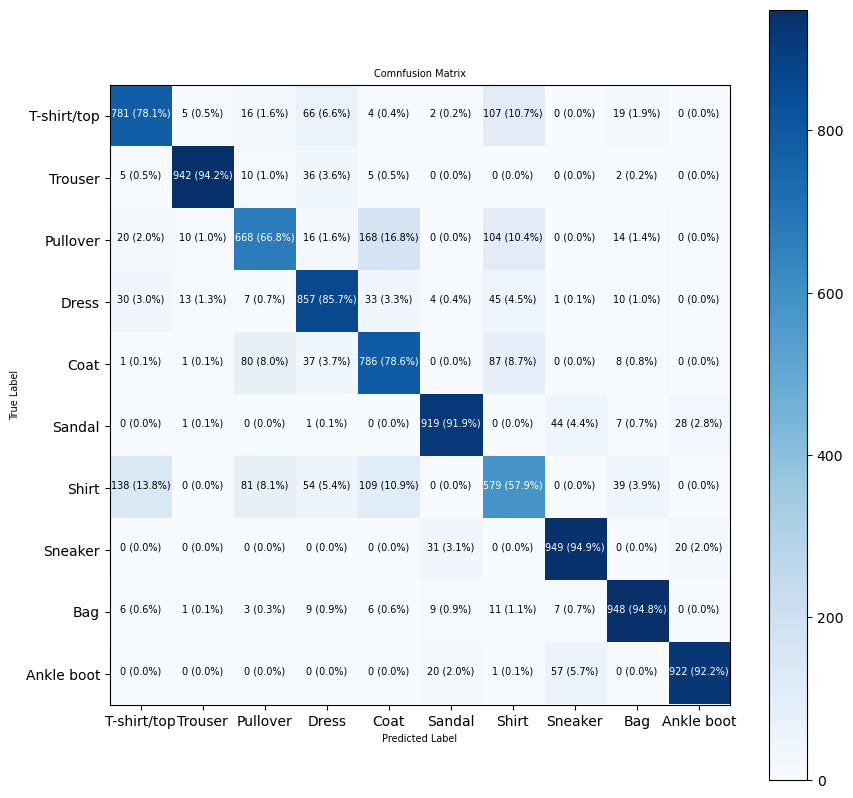

In [59]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_7.predict(test_data_norm), axis= 1),
                      classes= class_names,
                      text_size= 7)

The normalised data is working perrfectly with the activation functions let's try some other functions

In [60]:
tf.random.set_seed(42)

fashion_model_8 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(5, activation= 'relu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_8.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_8 = fashion_model_8.fit(train_data_norm, train_labels,
                                        epochs= 10,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 381us/step - loss: 0.8335 - accuracy: 0.7193 - val_loss: 0.6054 - val_accuracy: 0.7901
Epoch 2/10
1875/1875 [==============================] - 1s 350us/step - loss: 0.5521 - accuracy: 0.8066 - val_loss: 0.5850 - val_accuracy: 0.7992
Epoch 3/10
1875/1875 [==============================] - 1s 348us/step - loss: 0.5113 - accuracy: 0.8196 - val_loss: 0.5471 - val_accuracy: 0.8039
Epoch 4/10
1875/1875 [==============================] - 1s 349us/step - loss: 0.4913 - accuracy: 0.8284 - val_loss: 0.5232 - val_accuracy: 0.8145
Epoch 5/10
1875/1875 [==============================] - 1s 347us/step - loss: 0.4803 - accuracy: 0.8318 - val_loss: 0.5342 - val_accuracy: 0.8151
Epoch 6/10
1875/1875 [==============================] - 1s 358us/step - loss: 0.4717 - accuracy: 0.8344 - val_loss: 0.5120 - val_accuracy: 0.8193
Epoch 7/10
1875/1875 [==============================] - 1s 347us/step - loss: 0.4664 - accuracy: 0.8372 - val_loss: 0.5240 -

313/313 [==============================] - 0s 211us/step


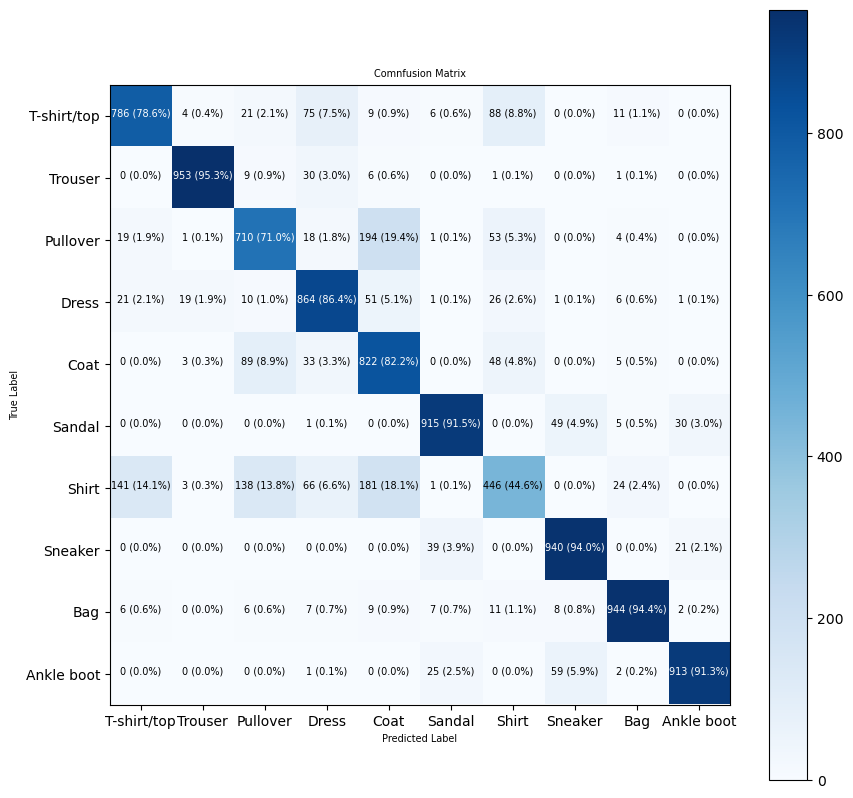

In [61]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_8.predict(test_data_norm), axis= 1),
                      classes= class_names,
                      text_size= 7)

In [62]:
fashion_model_8.evaluate(test_data_norm, test_labels), fashion_model_7.evaluate(test_data_norm, test_labels)

  1/313 [..............................] - ETA: 3s - loss: 0.5050 - accuracy: 0.8438

313/313 [==============================] - 0s 266us/step - loss: 0.4956 - accuracy: 0.8351


([0.49580103158950806, 0.8292999863624573],
 [0.49562695622444153, 0.835099995136261])

In [63]:
tf.random.set_seed(42)

fashion_model_9 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_9.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_9 = fashion_model_9.fit(train_data_norm, train_labels,
                                        epochs= 10,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 392us/step - loss: 0.6158 - accuracy: 0.7926 - val_loss: 0.5109 - val_accuracy: 0.8192
Epoch 2/10
1875/1875 [==============================] - 1s 357us/step - loss: 0.4539 - accuracy: 0.8415 - val_loss: 0.5080 - val_accuracy: 0.8188
Epoch 3/10
1875/1875 [==============================] - 1s 368us/step - loss: 0.4238 - accuracy: 0.8507 - val_loss: 0.4484 - val_accuracy: 0.8404
Epoch 4/10
1875/1875 [==============================] - 1s 358us/step - loss: 0.4067 - accuracy: 0.8577 - val_loss: 0.4344 - val_accuracy: 0.8492
Epoch 5/10
1875/1875 [==============================] - 1s 355us/step - loss: 0.3959 - accuracy: 0.8605 - val_loss: 0.4415 - val_accuracy: 0.8407
Epoch 6/10
1875/1875 [==============================] - 1s 356us/step - loss: 0.3853 - accuracy: 0.8636 - val_loss: 0.4415 - val_accuracy: 0.8438
Epoch 7/10
1875/1875 [==============================] - 1s 366us/step - loss: 0.3791 - accuracy: 0.8663 - val_loss: 0.4432 -

313/313 [==============================] - 0s 223us/step


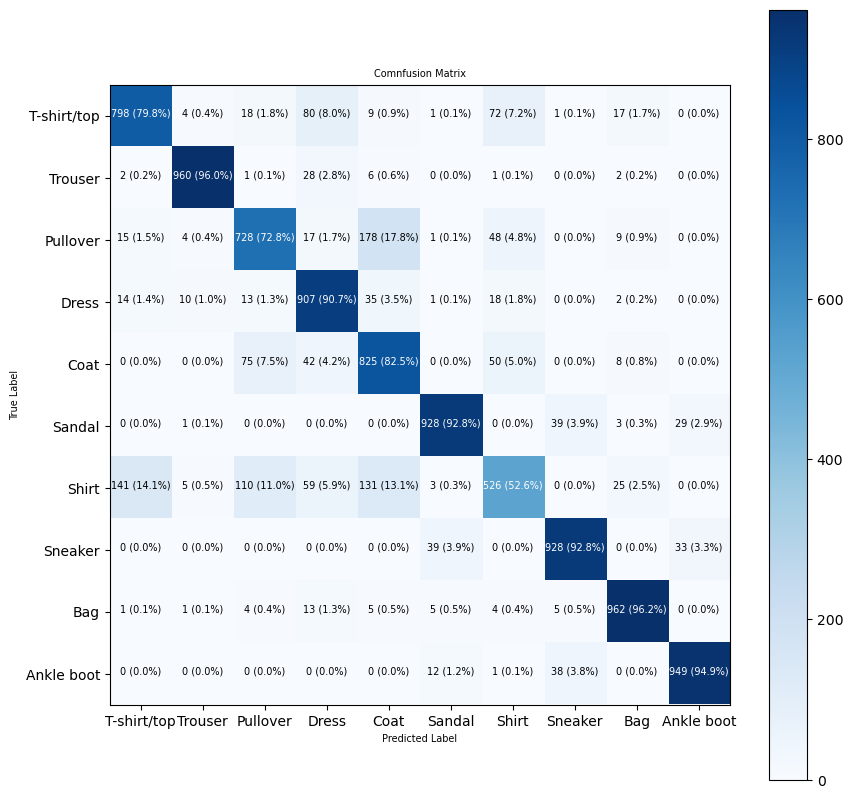

In [64]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_9.predict(test_data_norm), axis= 1),
                      classes= class_names,
                      text_size= 7)

In [65]:
fashion_model_9.evaluate(test_data_norm, test_labels)

  1/313 [..............................] - ETA: 3s - loss: 0.3526 - accuracy: 0.8438

313/313 [==============================] - 0s 406us/step - loss: 0.4227 - accuracy: 0.8511


[0.4226929545402527, 0.8511000275611877]

In [66]:
tf.random.set_seed(42)

fashion_model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'relu'),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_10.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_10 = fashion_model_10.fit(train_data_norm, train_labels,
                                        epochs= 10,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 416us/step - loss: 0.6609 - accuracy: 0.7729 - val_loss: 0.4973 - val_accuracy: 0.8262
Epoch 2/10
1875/1875 [==============================] - 1s 378us/step - loss: 0.4538 - accuracy: 0.8398 - val_loss: 0.4979 - val_accuracy: 0.8287
Epoch 3/10
1875/1875 [==============================] - 1s 374us/step - loss: 0.4247 - accuracy: 0.8494 - val_loss: 0.4547 - val_accuracy: 0.8403
Epoch 4/10
1875/1875 [==============================] - 1s 376us/step - loss: 0.4060 - accuracy: 0.8553 - val_loss: 0.4505 - val_accuracy: 0.8396
Epoch 5/10
1875/1875 [==============================] - 1s 389us/step - loss: 0.3968 - accuracy: 0.8584 - val_loss: 0.4505 - val_accuracy: 0.8418
Epoch 6/10
1875/1875 [==============================] - 1s 375us/step - loss: 0.3886 - accuracy: 0.8612 - val_loss: 0.4487 - val_accuracy: 0.8393
Epoch 7/10
1875/1875 [==============================] - 1s 377us/step - loss: 0.3823 - accuracy: 0.8637 - val_loss: 0.4468 -

313/313 [==============================] - 0s 225us/step


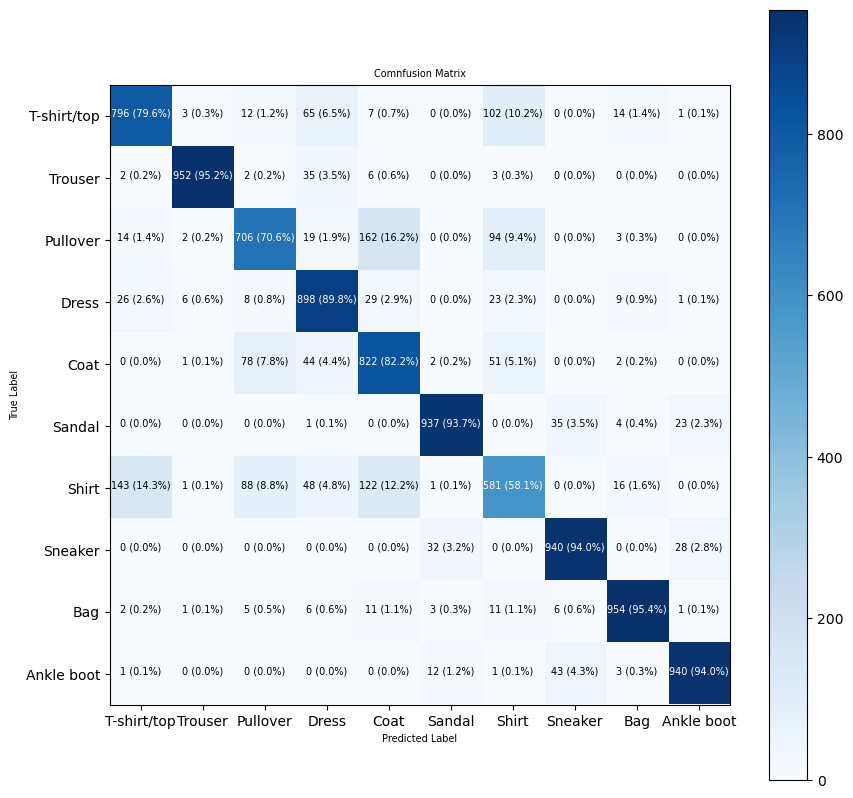

In [67]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_10.predict(test_data_norm), axis= 1),
                      classes= class_names,
                      text_size= 7)

In [68]:
tf.random.set_seed(42)

fashion_model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'relu'),
    tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_11.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_11 = fashion_model_11.fit(train_data_norm, train_labels,
                                        epochs= 10,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 440us/step - loss: 0.7447 - accuracy: 0.7490 - val_loss: 0.5411 - val_accuracy: 0.8122
Epoch 2/10
1875/1875 [==============================] - 1s 395us/step - loss: 0.4966 - accuracy: 0.8250 - val_loss: 0.5214 - val_accuracy: 0.8141
Epoch 3/10
1875/1875 [==============================] - 1s 406us/step - loss: 0.4593 - accuracy: 0.8383 - val_loss: 0.5038 - val_accuracy: 0.8224
Epoch 4/10
1875/1875 [==============================] - 1s 396us/step - loss: 0.4403 - accuracy: 0.8452 - val_loss: 0.4948 - val_accuracy: 0.8271
Epoch 5/10
1875/1875 [==============================] - 1s 397us/step - loss: 0.4267 - accuracy: 0.8501 - val_loss: 0.4943 - val_accuracy: 0.8235
Epoch 6/10
1875/1875 [==============================] - 1s 397us/step - loss: 0.4157 - accuracy: 0.8525 - val_loss: 0.4839 - val_accuracy: 0.8310
Epoch 7/10
1875/1875 [==============================] - 1s 396us/step - loss: 0.4090 - accuracy: 0.8539 - val_loss: 0.4947 -

313/313 [==============================] - 0s 232us/step


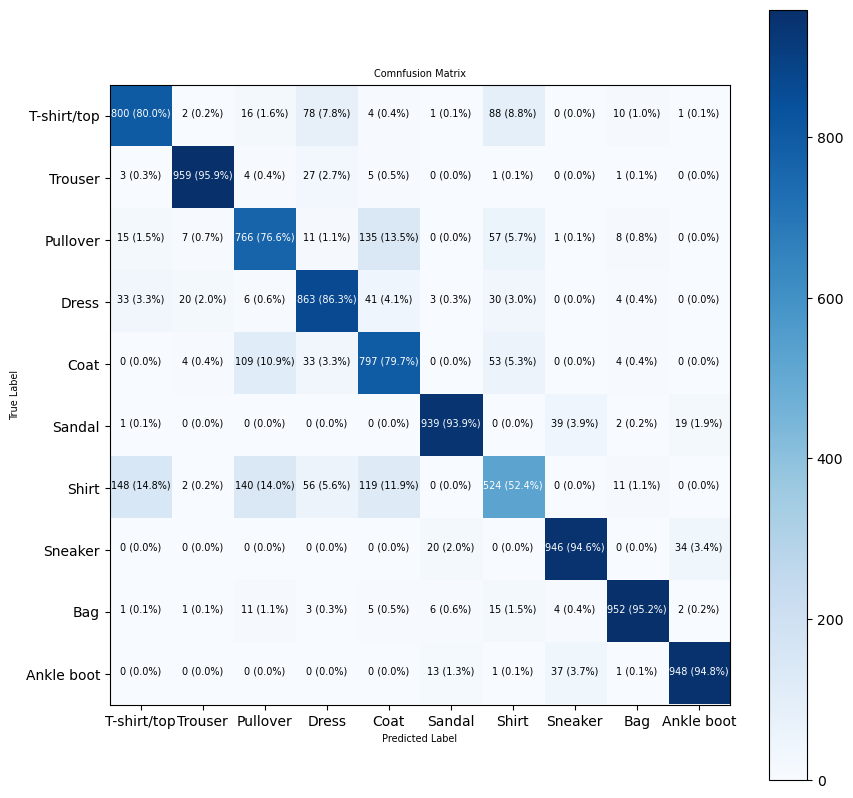

In [69]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_11.predict(test_data_norm), axis= 1),
                      classes= class_names,
                      text_size= 7)

In [70]:
tf.random.set_seed(42)

fashion_model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_12.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_12 = fashion_model_12.fit(train_data_norm, train_labels,
                                        epochs= 10,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 436us/step - loss: 0.7126 - accuracy: 0.7617 - val_loss: 0.5175 - val_accuracy: 0.8170
Epoch 2/10
1875/1875 [==============================] - 1s 405us/step - loss: 0.4645 - accuracy: 0.8354 - val_loss: 0.4775 - val_accuracy: 0.8330
Epoch 3/10
1875/1875 [==============================] - 1s 395us/step - loss: 0.4226 - accuracy: 0.8499 - val_loss: 0.4700 - val_accuracy: 0.8313
Epoch 4/10
1875/1875 [==============================] - 1s 394us/step - loss: 0.3998 - accuracy: 0.8575 - val_loss: 0.4454 - val_accuracy: 0.8430
Epoch 5/10
1875/1875 [==============================] - 1s 394us/step - loss: 0.3889 - accuracy: 0.8610 - val_loss: 0.4443 - val_accuracy: 0.8409
Epoch 6/10
1875/1875 [==============================] - 1s 397us/step - loss: 0.3760 - accuracy: 0.8659 - val_loss: 0.4441 - val_accuracy: 0.8401
Epoch 7/10
1875/1875 [==============================] - 1s 408us/step - loss: 0.3708 - accuracy: 0.8678 - val_loss: 0.4423 -

313/313 [==============================] - 0s 239us/step


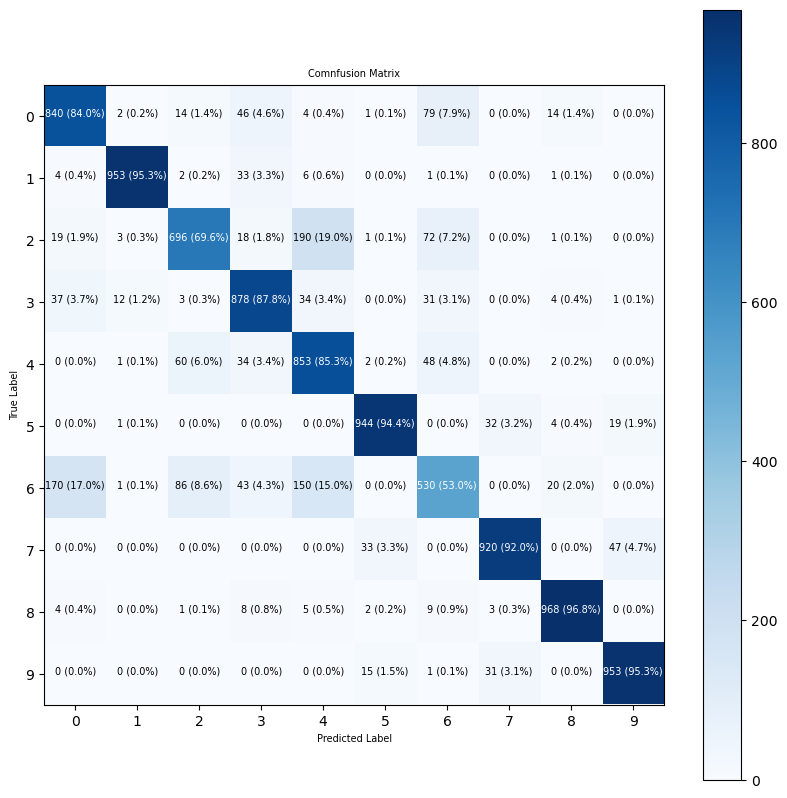

In [71]:
plot_confusion_matrix(y_true= test_labels,
                      y_pred= tf.argmax(fashion_model_12.predict(test_data_norm), axis= 1),
                      text_size= 7)

In [72]:
tf.random.set_seed(42)

fashion_model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_13.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_13 = fashion_model_13.fit(train_data_norm, train_labels,
                                        epochs= 10,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 465us/step - loss: 0.7790 - accuracy: 0.7454 - val_loss: 0.5591 - val_accuracy: 0.8085
Epoch 2/10
1875/1875 [==============================] - 1s 422us/step - loss: 0.4925 - accuracy: 0.8306 - val_loss: 0.5290 - val_accuracy: 0.8209
Epoch 3/10
1875/1875 [==============================] - 1s 420us/step - loss: 0.4509 - accuracy: 0.8453 - val_loss: 0.4804 - val_accuracy: 0.8306
Epoch 4/10
1875/1875 [==============================] - 1s 421us/step - loss: 0.4253 - accuracy: 0.8517 - val_loss: 0.4537 - val_accuracy: 0.8415
Epoch 5/10
1875/1875 [==============================] - 1s 418us/step - loss: 0.4113 - accuracy: 0.8550 - val_loss: 0.4485 - val_accuracy: 0.8425
Epoch 6/10
1875/1875 [==============================] - 1s 429us/step - loss: 0.3975 - accuracy: 0.8597 - val_loss: 0.4562 - val_accuracy: 0.8398
Epoch 7/10
1875/1875 [==============================] - 1s 419us/step - loss: 0.3884 - accuracy: 0.8636 - val_loss: 0.4489 -

313/313 [==============================] - 0s 258us/step


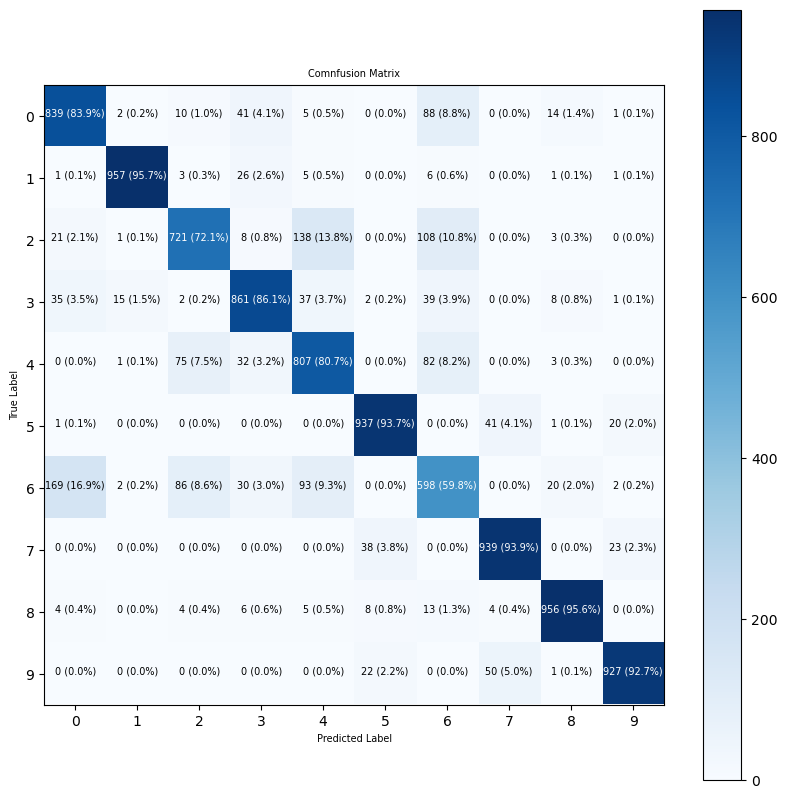

In [73]:
plot_confusion_matrix(test_labels,
                      tf.argmax(fashion_model_13.predict(test_data_norm), axis= 1),
                      text_size= 7)

In [74]:
tf.random.set_seed(42)

fashion_model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_14.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_14 = fashion_model_14.fit(train_data_norm, train_labels,
                                        epochs= 100,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/100
1875/1875 [==============================] - 1s 465us/step - loss: 0.7274 - accuracy: 0.7698 - val_loss: 0.5339 - val_accuracy: 0.8161
Epoch 2/100
1875/1875 [==============================] - 1s 422us/step - loss: 0.4730 - accuracy: 0.8382 - val_loss: 0.4878 - val_accuracy: 0.8335
Epoch 3/100
1875/1875 [==============================] - 1s 421us/step - loss: 0.4317 - accuracy: 0.8525 - val_loss: 0.4714 - val_accuracy: 0.8359
Epoch 4/100
1875/1875 [==============================] - 1s 432us/step - loss: 0.4072 - accuracy: 0.8605 - val_loss: 0.4605 - val_accuracy: 0.8409
Epoch 5/100
1875/1875 [==============================] - 1s 421us/step - loss: 0.3923 - accuracy: 0.8648 - val_loss: 0.4466 - val_accuracy: 0.8441
Epoch 6/100
1875/1875 [==============================] - 1s 425us/step - loss: 0.3809 - accuracy: 0.8668 - val_loss: 0.4560 - val_accuracy: 0.8356
Epoch 7/100
1875/1875 [==============================] - 1s 422us/step - loss: 0.3722 - accuracy: 0.8701 - val_loss: 0

313/313 [==============================] - 0s 238us/step


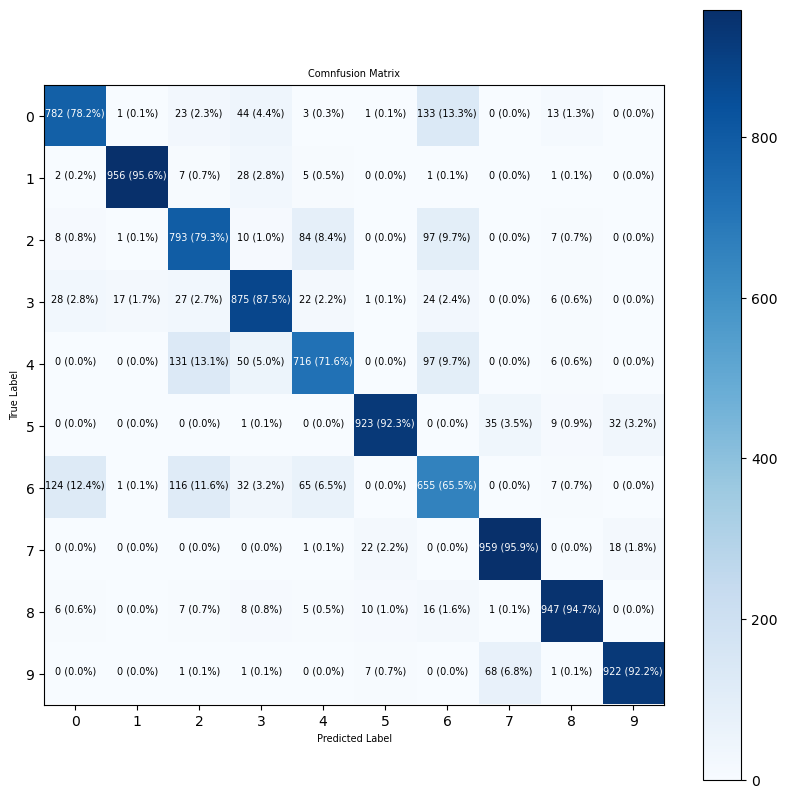

In [75]:
plot_confusion_matrix(test_labels,
                      tf.argmax(fashion_model_14.predict(test_data_norm), axis= 1),
                      text_size= 7)

Let's analyse the learning rate and the loss value and see if there is improvement in the accuracy because of the learning rate

In [76]:
tf.random.set_seed(42)

fashion_model_15 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

lr_fashion_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 30))

fashion_model_15.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(),
                        metrics= ['accuracy'])

fashion_history_15 = fashion_model_15.fit(train_data_norm, train_labels,
                                        epochs= 100,
                                        validation_data= (test_data_norm, test_labels),
                                        callbacks= [lr_fashion_scheduler])

Epoch 1/100
1875/1875 [==============================] - 1s 468us/step - loss: 1.5666 - accuracy: 0.5334 - val_loss: 1.1750 - val_accuracy: 0.7059 - lr: 1.0000e-04
Epoch 2/100
1875/1875 [==============================] - 1s 424us/step - loss: 0.9544 - accuracy: 0.7487 - val_loss: 0.8237 - val_accuracy: 0.7614 - lr: 1.0798e-04
Epoch 3/100
1875/1875 [==============================] - 1s 424us/step - loss: 0.7185 - accuracy: 0.7828 - val_loss: 0.6812 - val_accuracy: 0.7778 - lr: 1.1659e-04
Epoch 4/100
1875/1875 [==============================] - 1s 422us/step - loss: 0.6164 - accuracy: 0.7994 - val_loss: 0.6138 - val_accuracy: 0.7927 - lr: 1.2589e-04
Epoch 5/100
1875/1875 [==============================] - 1s 422us/step - loss: 0.5627 - accuracy: 0.8164 - val_loss: 0.5705 - val_accuracy: 0.8071 - lr: 1.3594e-04
Epoch 6/100
1875/1875 [==============================] - 1s 434us/step - loss: 0.5286 - accuracy: 0.8261 - val_loss: 0.5463 - val_accuracy: 0.8156 - lr: 1.4678e-04
Epoch 7/100
1875

Text(0.5, 1.0, 'Learning rate vs Loss value')

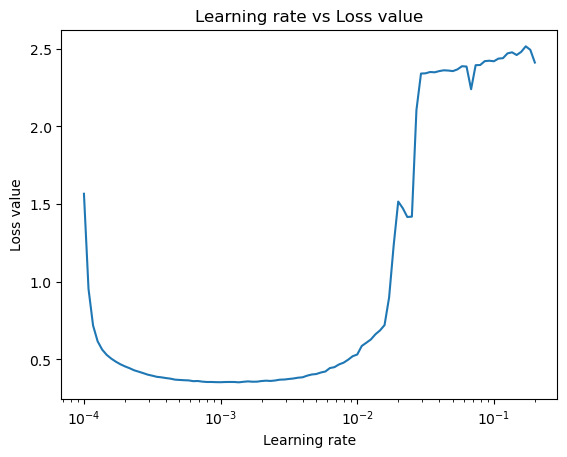

In [77]:
plt.semilogx(fashion_history_15.history['lr'], fashion_history_15.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss value")
plt.title("Learning rate vs Loss value")

In [78]:
2e-4

0.0002

In [79]:
tf.random.set_seed(42)
learning_rate = 2e-4

fashion_model_16 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_16.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(learning_rate= learning_rate),
                        metrics= ['accuracy'])

fashion_history_16 = fashion_model_16.fit(train_data_norm, train_labels,
                                        epochs= 100,
                                        validation_data= (test_data_norm, test_labels),
                                        callbacks= [lr_fashion_scheduler])

Epoch 1/100
1875/1875 [==============================] - 1s 466us/step - loss: 1.5147 - accuracy: 0.5997 - val_loss: 1.1703 - val_accuracy: 0.6898 - lr: 1.0000e-04
Epoch 2/100
1875/1875 [==============================] - 1s 421us/step - loss: 0.9598 - accuracy: 0.7396 - val_loss: 0.8320 - val_accuracy: 0.7708 - lr: 1.0798e-04
Epoch 3/100
1875/1875 [==============================] - 1s 422us/step - loss: 0.7190 - accuracy: 0.7928 - val_loss: 0.6737 - val_accuracy: 0.7994 - lr: 1.1659e-04
Epoch 4/100
1875/1875 [==============================] - 1s 421us/step - loss: 0.6080 - accuracy: 0.8110 - val_loss: 0.6006 - val_accuracy: 0.8107 - lr: 1.2589e-04
Epoch 5/100
1875/1875 [==============================] - 1s 431us/step - loss: 0.5500 - accuracy: 0.8227 - val_loss: 0.5650 - val_accuracy: 0.8166 - lr: 1.3594e-04
Epoch 6/100
1875/1875 [==============================] - 1s 419us/step - loss: 0.5145 - accuracy: 0.8309 - val_loss: 0.5415 - val_accuracy: 0.8173 - lr: 1.4678e-04
Epoch 7/100
1875

In [80]:
tf.random.set_seed(42)
learning_rate = 2e-4

fashion_model_17 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'elu'),
    # tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(10, activation= 'tanh'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_17.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(learning_rate= learning_rate),
                        metrics= ['accuracy'])

fashion_history_17 = fashion_model_17.fit(train_data_norm, train_labels,
                                        epochs= 20,
                                        validation_data= (test_data_norm, test_labels),
                                        callbacks= [lr_fashion_scheduler])

Epoch 1/20
1875/1875 [==============================] - 1s 477us/step - loss: 1.4457 - accuracy: 0.5536 - val_loss: 1.0930 - val_accuracy: 0.7045 - lr: 1.0000e-04
Epoch 2/20
1875/1875 [==============================] - 1s 457us/step - loss: 0.9169 - accuracy: 0.7525 - val_loss: 0.8187 - val_accuracy: 0.7667 - lr: 1.0798e-04
Epoch 3/20
1875/1875 [==============================] - 1s 417us/step - loss: 0.7174 - accuracy: 0.7913 - val_loss: 0.6787 - val_accuracy: 0.7911 - lr: 1.1659e-04
Epoch 4/20
1875/1875 [==============================] - 1s 415us/step - loss: 0.6135 - accuracy: 0.8079 - val_loss: 0.6052 - val_accuracy: 0.8036 - lr: 1.2589e-04
Epoch 5/20
1875/1875 [==============================] - 1s 448us/step - loss: 0.5547 - accuracy: 0.8181 - val_loss: 0.5653 - val_accuracy: 0.8102 - lr: 1.3594e-04
Epoch 6/20
1875/1875 [==============================] - 1s 470us/step - loss: 0.5179 - accuracy: 0.8249 - val_loss: 0.5385 - val_accuracy: 0.8177 - lr: 1.4678e-04
Epoch 7/20
1875/1875 [

313/313 [==============================] - 0s 235us/step


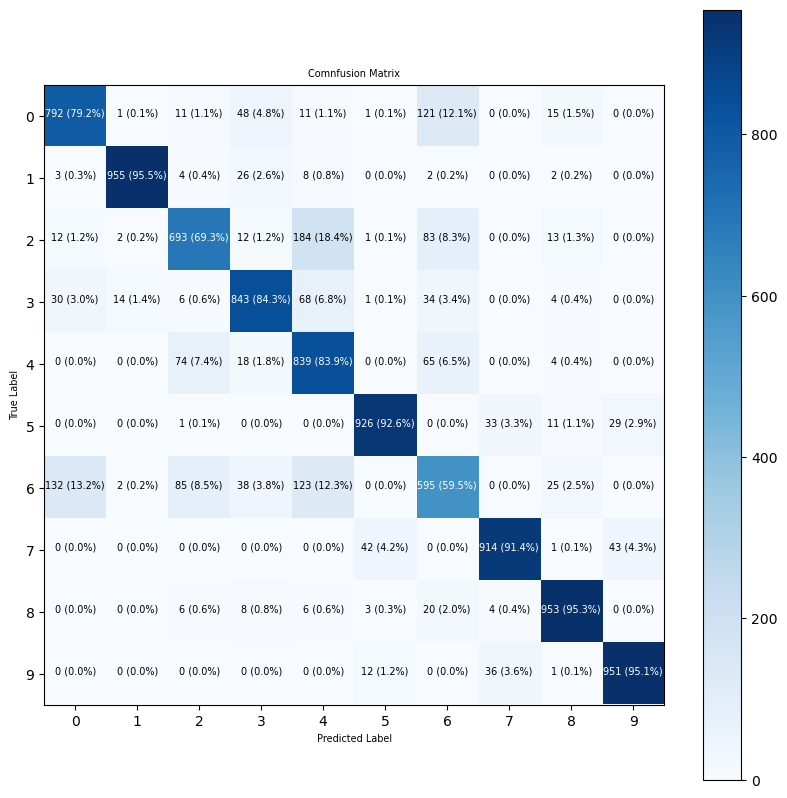

In [81]:
plot_confusion_matrix(test_labels,
                      tf.argmax(fashion_model_17.predict(test_data_norm), axis= 1),
                      text_size= 7)

In [82]:
tf.random.set_seed(42)
learning_rate = 2e-4

fashion_model_18 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(50, activation= 'elu'),
    tf.keras.layers.Dense(100, activation= 'exponential'),
    tf.keras.layers.Dense(100, activation= 'tanh'),
    tf.keras.layers.Dense(50, activation= 'tanh'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_18.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(learning_rate= learning_rate),
                        metrics= ['accuracy'])

fashion_history_18 = fashion_model_18.fit(train_data_norm, train_labels,
                                        epochs= 20,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 1s 620us/step - loss: 0.6738 - accuracy: 0.7679 - val_loss: 0.5117 - val_accuracy: 0.8173
Epoch 2/20
1875/1875 [==============================] - 1s 581us/step - loss: 0.4538 - accuracy: 0.8369 - val_loss: 0.4772 - val_accuracy: 0.8239
Epoch 3/20
1875/1875 [==============================] - 1s 590us/step - loss: 0.4166 - accuracy: 0.8489 - val_loss: 0.4325 - val_accuracy: 0.8409
Epoch 4/20
1875/1875 [==============================] - 1s 601us/step - loss: 0.3926 - accuracy: 0.8566 - val_loss: 0.4176 - val_accuracy: 0.8474
Epoch 5/20
1875/1875 [==============================] - 1s 576us/step - loss: 0.3773 - accuracy: 0.8629 - val_loss: 0.4144 - val_accuracy: 0.8493
Epoch 6/20
1875/1875 [==============================] - 1s 571us/step - loss: 0.3645 - accuracy: 0.8676 - val_loss: 0.4267 - val_accuracy: 0.8404
Epoch 7/20
1875/1875 [==============================] - 1s 561us/step - loss: 0.3552 - accuracy: 0.8709 - val_loss: 0.4042 -

313/313 [==============================] - 0s 296us/step


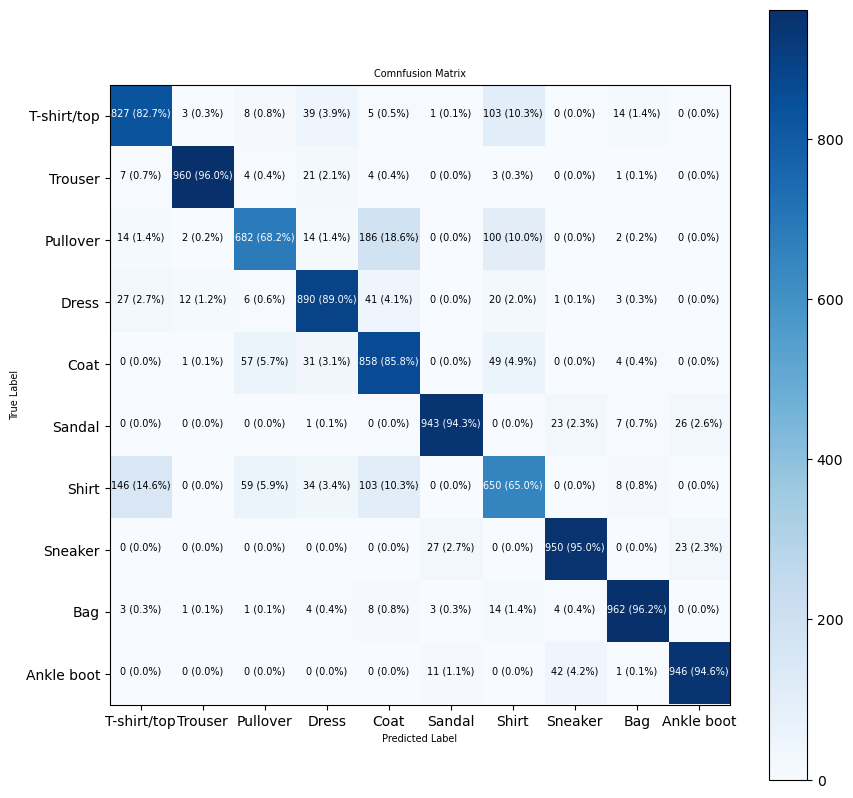

In [83]:
plot_confusion_matrix(test_labels,
                      tf.argmax(fashion_model_18.predict(test_data_norm), axis= 1),
                      text_size= 7,
                      classes= class_names)

In [84]:
tf.random.set_seed(42)
learning_rate = 2e-4

fashion_model_19 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(50, activation= 'elu'),
    tf.keras.layers.Dense(100, activation= 'exponential'),
    tf.keras.layers.Dense(100, activation= 'tanh'),
    tf.keras.layers.Dense(50, activation= 'tanh'),
    tf.keras.layers.Dense(5, activation= 'relu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_19.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(learning_rate= learning_rate),
                        metrics= ['accuracy'])

fashion_history_19 = fashion_model_19.fit(train_data_norm, train_labels,
                                        epochs= 20,
                                        validation_data= (test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 2s 633us/step - loss: 1.1376 - accuracy: 0.5739 - val_loss: 0.7615 - val_accuracy: 0.7494
Epoch 2/20
1875/1875 [==============================] - 1s 574us/step - loss: 0.6056 - accuracy: 0.8065 - val_loss: 0.5801 - val_accuracy: 0.8067
Epoch 3/20
1875/1875 [==============================] - 1s 572us/step - loss: 0.4985 - accuracy: 0.8328 - val_loss: 0.4992 - val_accuracy: 0.8268
Epoch 4/20
1875/1875 [==============================] - 1s 575us/step - loss: 0.4519 - accuracy: 0.8440 - val_loss: 0.4752 - val_accuracy: 0.8348
Epoch 5/20
1875/1875 [==============================] - 1s 589us/step - loss: 0.4242 - accuracy: 0.8523 - val_loss: 0.4519 - val_accuracy: 0.8415
Epoch 6/20
1875/1875 [==============================] - 1s 579us/step - loss: 0.4068 - accuracy: 0.8578 - val_loss: 0.4500 - val_accuracy: 0.8380
Epoch 7/20
1875/1875 [==============================] - 1s 579us/step - loss: 0.3939 - accuracy: 0.8613 - val_loss: 0.4415 -

313/313 [==============================] - 0s 327us/step


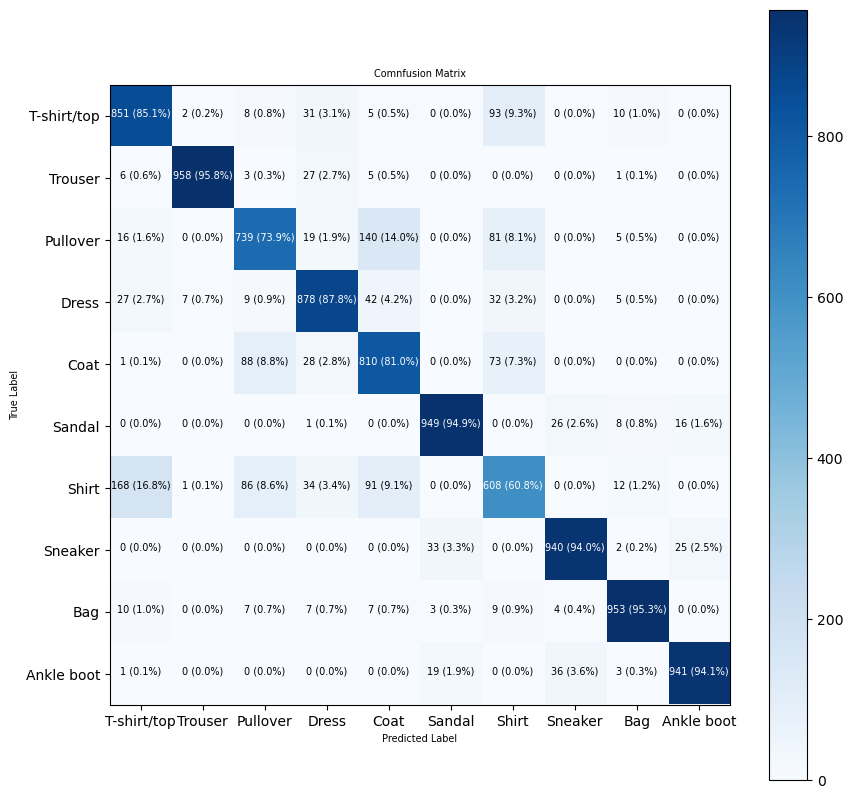

In [85]:
plot_confusion_matrix(test_labels,
                      tf.argmax(fashion_model_19.predict(test_data_norm), axis= 1),
                      classes= class_names,
                      text_size= 7)

Since the model is not improving and the main culprit is prediction of Shirt, Pullover and T-short/Top, we have to look into other aspect of improving the model.

Let's first visualise the above poorly predicted images and see what can be done

In [86]:
#indexes where the above mentioned labels are
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [87]:
def plot_normalised_orginal_data(original_data, normalised_data):
    plt.figure(figsize= (10, 10))
    rand_prob = [random.randint(0, original_data.shape[0]) for _ in range(3)]
    j = 1
    for i in range(3):
        ax = plt.subplot(3, 2, j)
        plt.imshow(original_data[rand_prob[i]])
        plt.title(f"Original {class_names[train_labels[rand_prob[i]]]}")
        plt.axis(False)
        j += 1
        ax = plt.subplot(3, 2, j)
        plt.imshow(normalised_data[rand_prob[i]])
        plt.title(f"Normalised {class_names[train_labels[rand_prob[i]]]}")
        j += 1
        plt.tight_layout()
        plt.axis(False)

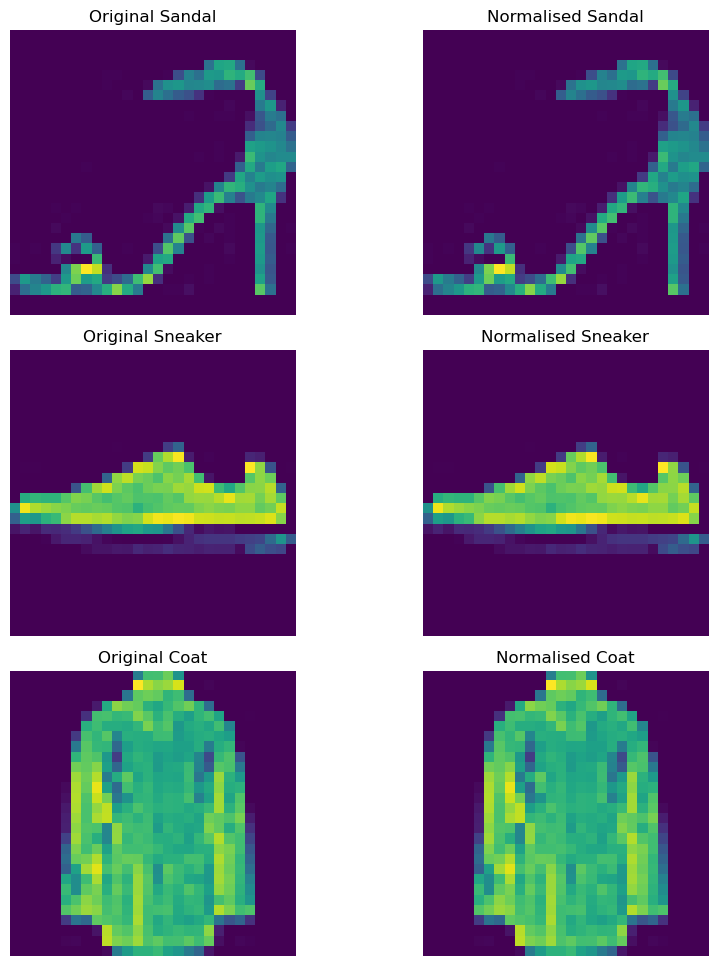

In [88]:
plot_normalised_orginal_data(train_data, train_data_norm)

## Normalising the data using different approaches

Normalising the data with different scalers available and plotting the images so that if the difference between each image is evident then it would be easy for the model to classify

In [89]:
tf.reduce_max(train_data_norm)

<tf.Tensor: shape=(), dtype=float64, numpy=1.0>

In [90]:
tf.reshape(train_data, (train_data.shape[0], 28 * 28))

<tf.Tensor: shape=(60000, 784), dtype=uint8, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)>

In [91]:
minmax_scaler = MinMaxScaler()

minmax_scaler.fit(tf.reshape(train_data, (train_data.shape[0], 28 * 28)))

train_data_minmax = minmax_scaler.transform(tf.reshape(train_data, (train_data.shape[0], 28 * 28)))
test_data_minmax = minmax_scaler.transform(tf.reshape(test_data, (test_data.shape[0], 28 * 28)))

train_data_minmax.shape, test_data_minmax.shape

((60000, 784), (10000, 784))

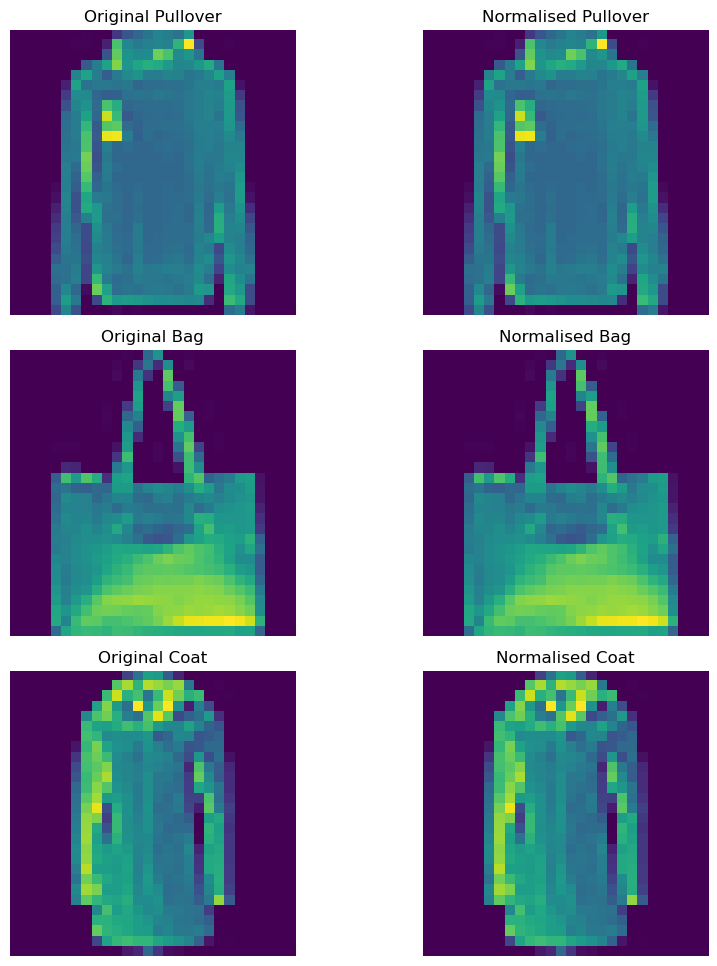

In [92]:
plot_normalised_orginal_data(train_data, tf.reshape(train_data_minmax, shape= (train_data.shape)))

In [93]:
std_scaler = StandardScaler()

std_scaler.fit(tf.reshape(train_data, (train_data.shape[0], 28 * 28)))

train_data_std = std_scaler.transform(tf.reshape(train_data, (train_data.shape[0], 28 * 28)))
test_data_std = std_scaler.transform(tf.reshape(test_data, (test_data.shape[0], 28 * 28)))

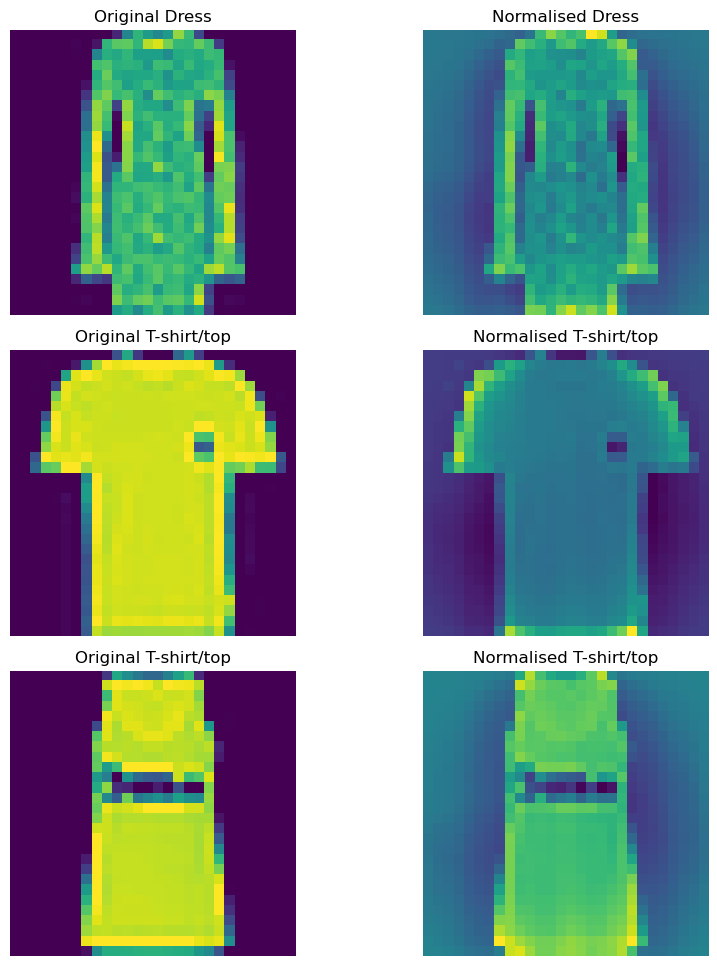

In [94]:
plot_normalised_orginal_data(train_data, tf.reshape(train_data_std, shape= (train_data.shape)))

Number of components: 16
Number of components: 64
Number of components: 144
Number of components: 256
Number of components: 400
Number of components: 576
Number of components: 784
7


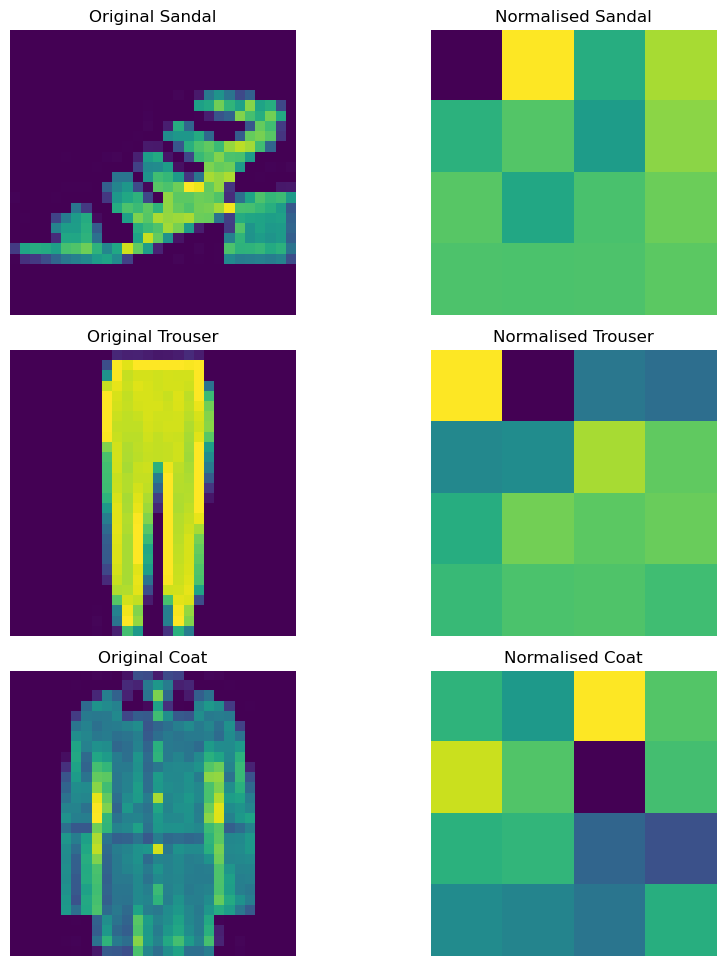

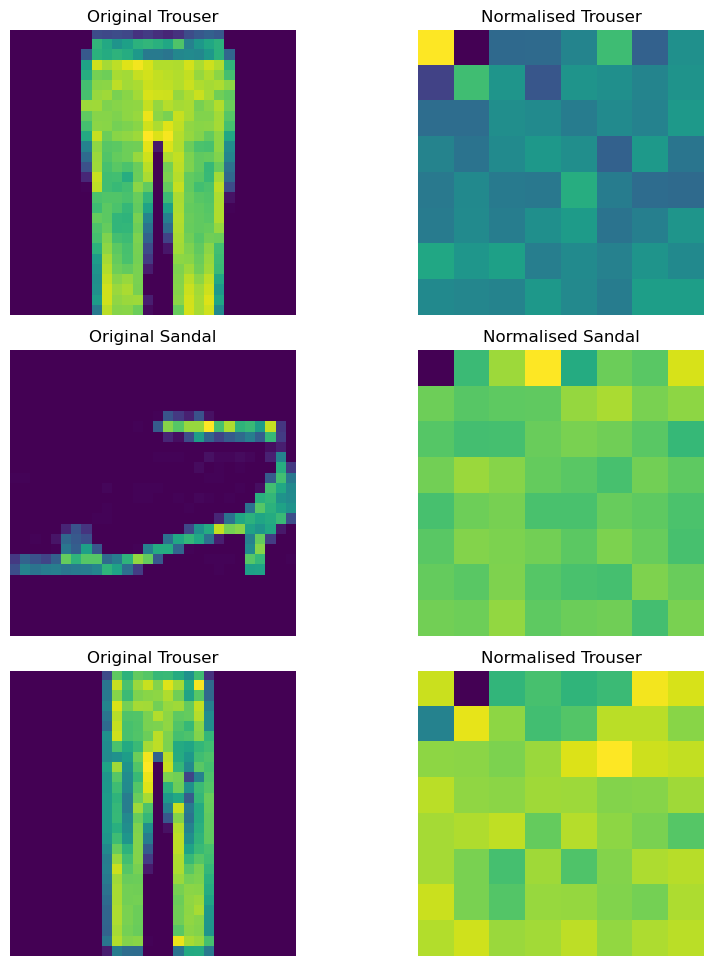

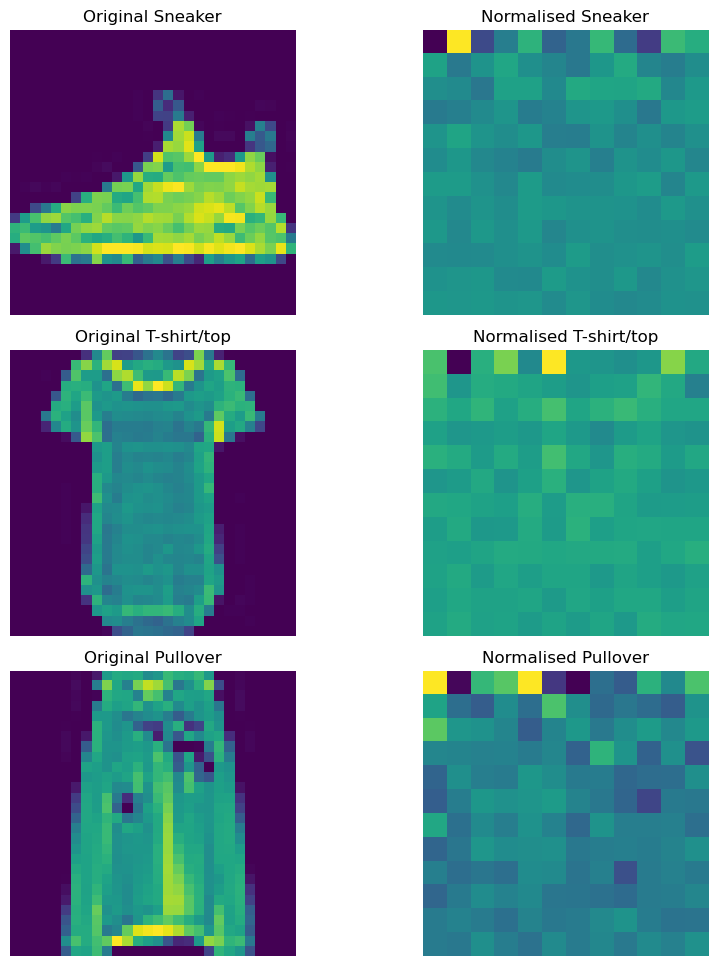

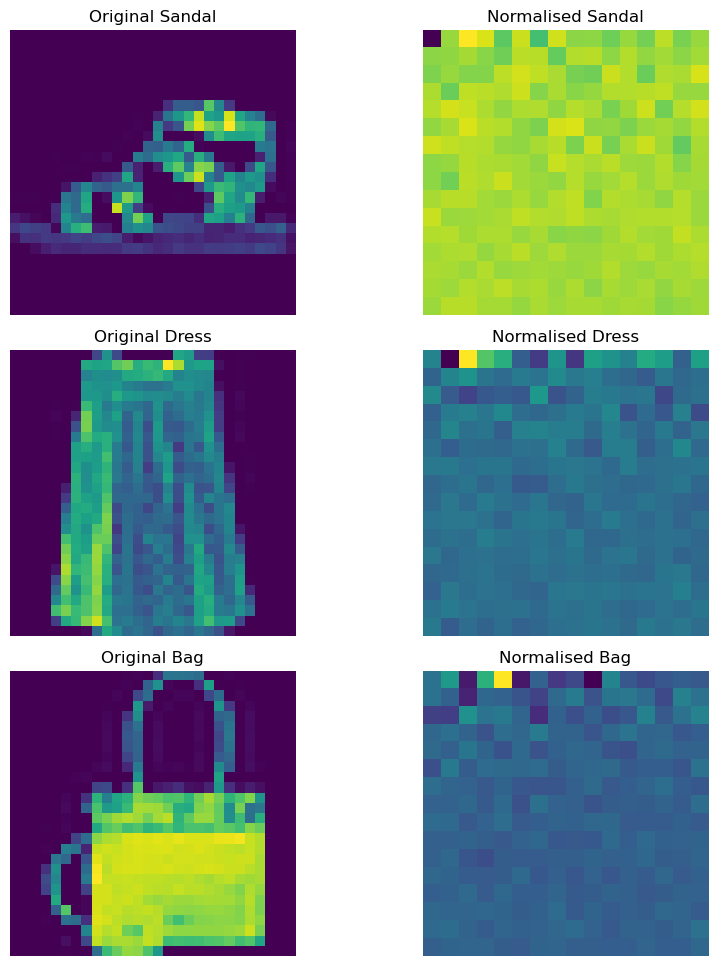

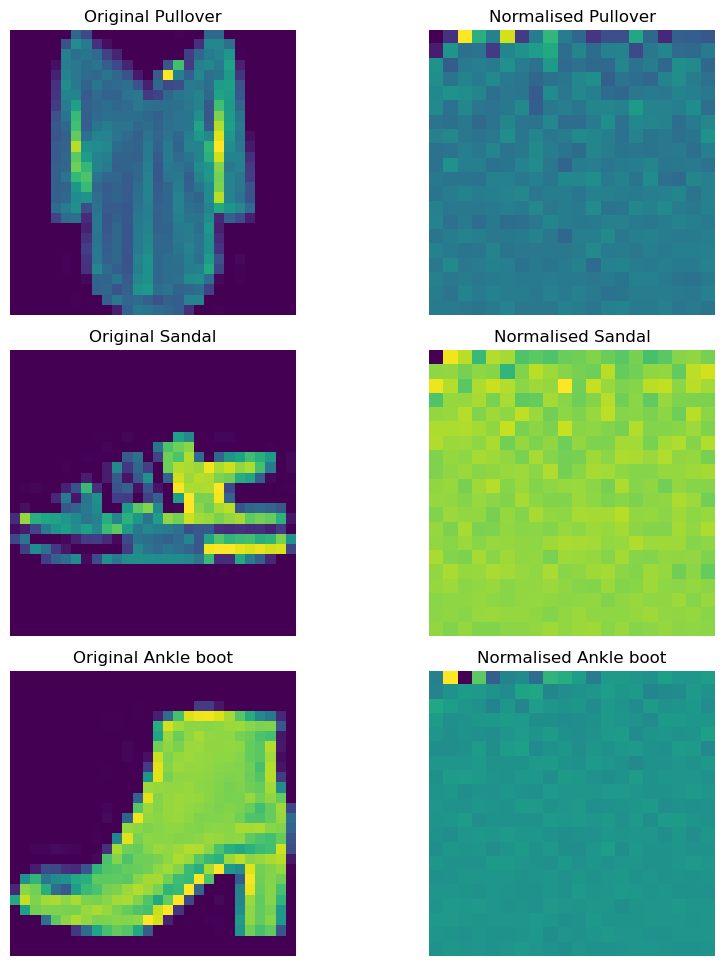

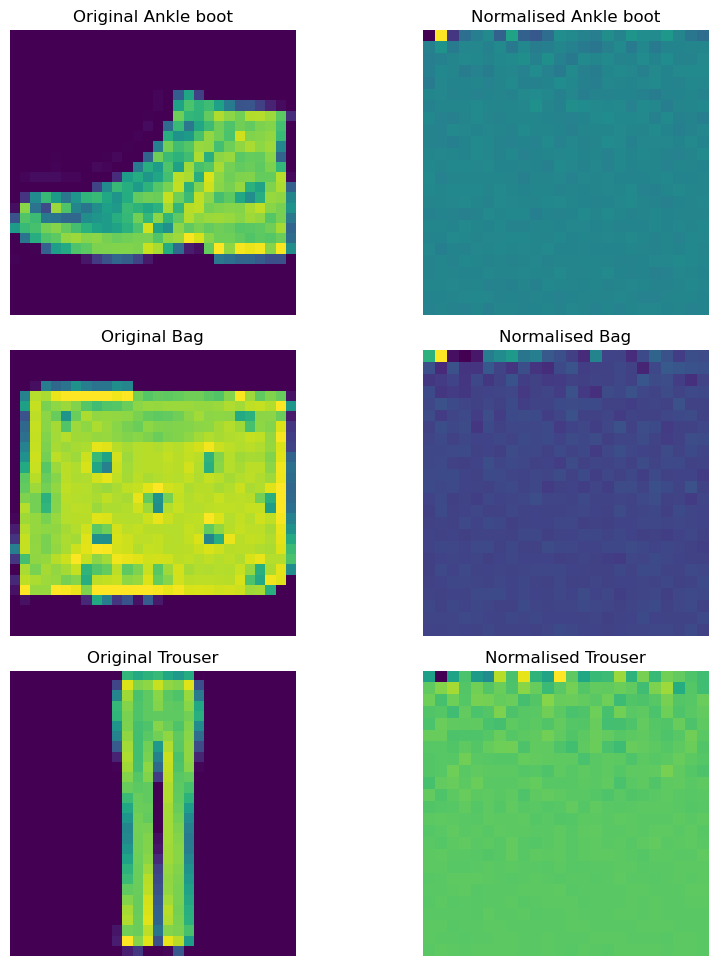

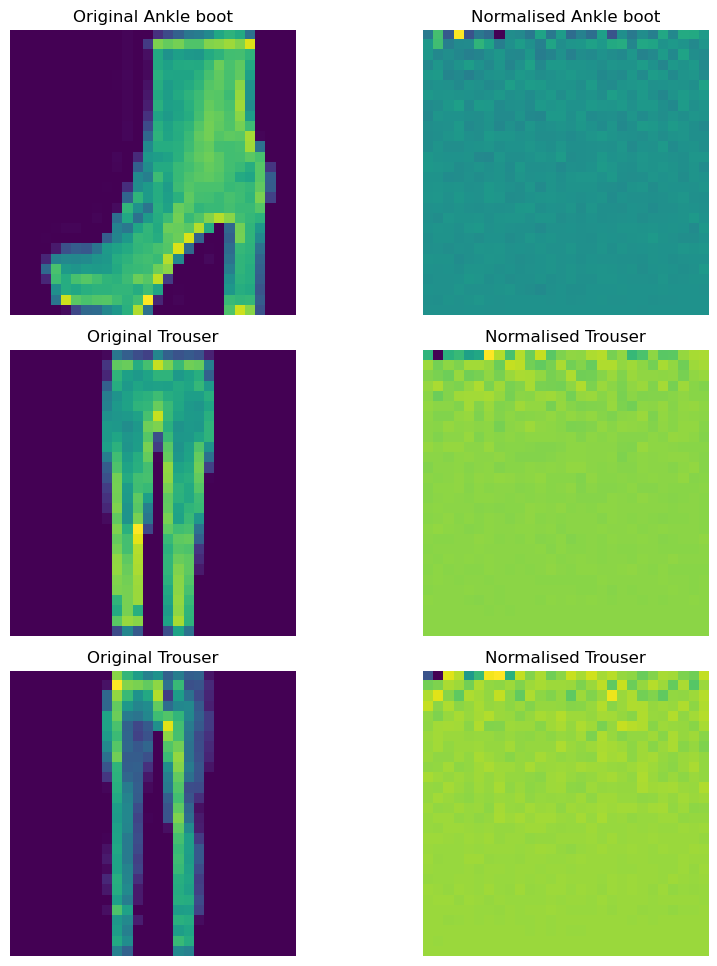

In [120]:
pca_data = []

for e in range (4, 29, 4):
    pca = PCA(n_components= e ** 2)
    train_data_pca = pca.fit_transform(tf.reshape(train_data, shape= (train_data.shape[0], 28 * 28)))
    print(f"Number of components: {e ** 2}")
    plot_normalised_orginal_data(train_data, tf.reshape(train_data_pca, shape= (train_data.shape[0], e, e)))
    pca_data.append(train_data_pca)

print(len(pca_data))

## Checking the best performing model out of the above model created

In [104]:
models = [fashion_model_1, fashion_model_2, fashion_model_3, fashion_model_4, fashion_model_5, fashion_model_6, fashion_model_7,
          fashion_model_8, fashion_model_9, fashion_model_10, fashion_model_11, fashion_model_12, fashion_model_13, fashion_model_14, fashion_model_15, fashion_model_16, fashion_model_17, fashion_model_18, fashion_model_19]

for i, model in enumerate(models):
    print(f"Model: {i + 1}")
    if models.index(model) < models.index(fashion_model_7):
        model.evaluate(test_data, test_labels)
    else:
        model.evaluate(test_data_norm, test_labels)

Model: 1
  1/313 [..............................] - ETA: 3s - loss: 10.6480 - accuracy: 0.7812

313/313 [==============================] - 0s 312us/step - loss: 11.5748 - accuracy: 0.7754
Model: 2
313/313 [==============================] - 0s 280us/step - loss: 1.6528 - accuracy: 0.2645
Model: 3
313/313 [==============================] - 0s 280us/step - loss: 1.4672 - accuracy: 0.3744
Model: 4
313/313 [==============================] - 0s 270us/step - loss: 11.1867 - accuracy: 0.8233
Model: 5
313/313 [==============================] - 0s 277us/step - loss: 0.6085 - accuracy: 0.8047
Model: 6
313/313 [==============================] - 0s 274us/step - loss: 1.5748 - accuracy: 0.3401
Model: 7
313/313 [==============================] - 0s 285us/step - loss: 0.4956 - accuracy: 0.8351
Model: 8
313/313 [==============================] - 0s 291us/step - loss: 0.4958 - accuracy: 0.8293
Model: 9
313/313 [==============================] - 0s 292us/step - loss: 0.4227 - accuracy: 0.8511
Model: 10
313/313 [==============================] - 0s 286us/step - loss: 0.4138 - accuracy: 0.8526
Model:

## Experiment
Model 19, Model 18 are the best performing models our of the above.


Let's try using the other normalisation approaches into the above models and let's see their performance.

The experiement will be as below:
1. Try with Standard scaler normalised data
2. Then try with different pca decomposed data

For each model training we need to reshape the model accordingly.

In [105]:
fashion_model_18.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_71 (Dense)            (None, 10)                7850      
                                                                 
 dense_72 (Dense)            (None, 50)                550       
                                                                 
 dense_73 (Dense)            (None, 100)               5100      
                                                                 
 dense_74 (Dense)            (None, 100)               10100     
                                                                 
 dense_75 (Dense)            (None, 50)                5050      
                                                                 
 dense_76 (Dense)            (None, 10)              

In [106]:
tf.random.set_seed(42)
learning_rate = 2e-4

fashion_model_20 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(50, activation= 'elu'),
    tf.keras.layers.Dense(100, activation= 'exponential'),
    tf.keras.layers.Dense(100, activation= 'tanh'),
    tf.keras.layers.Dense(50, activation= 'tanh'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_20.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(learning_rate= learning_rate),
                        metrics= ['accuracy'])

fashion_history_20 = fashion_model_20.fit(tf.reshape(train_data_std, shape= train_data.shape), train_labels,
                                        epochs= 20,
                                        validation_data= (tf.reshape(test_data_std, shape= test_data.shape), test_labels))

Epoch 1/20
1875/1875 [==============================] - 2s 659us/step - loss: 0.6300 - accuracy: 0.7834 - val_loss: 0.4809 - val_accuracy: 0.8320
Epoch 2/20
1875/1875 [==============================] - 1s 581us/step - loss: 0.4310 - accuracy: 0.8464 - val_loss: 0.4434 - val_accuracy: 0.8414
Epoch 3/20
1875/1875 [==============================] - 1s 596us/step - loss: 0.3929 - accuracy: 0.8600 - val_loss: 0.4208 - val_accuracy: 0.8472
Epoch 4/20
1875/1875 [==============================] - 1s 580us/step - loss: 0.3720 - accuracy: 0.8664 - val_loss: 0.4115 - val_accuracy: 0.8536
Epoch 5/20
1875/1875 [==============================] - 1s 589us/step - loss: 0.3569 - accuracy: 0.8718 - val_loss: 0.4128 - val_accuracy: 0.8522
Epoch 6/20
1875/1875 [==============================] - 1s 596us/step - loss: 0.3435 - accuracy: 0.8767 - val_loss: 0.4013 - val_accuracy: 0.8582
Epoch 7/20
1875/1875 [==============================] - 1s 585us/step - loss: 0.3338 - accuracy: 0.8795 - val_loss: 0.3942 -

In [108]:
fashion_model_18.evaluate(test_data_norm, test_labels), fashion_model_20.evaluate(tf.reshape(test_data_std, shape= test_data_std.shape), test_labels)

313/313 [==============================] - 0s 389us/step - loss: 0.3853 - accuracy: 0.8632


([0.37669819593429565, 0.8668000102043152],
 [0.38529905676841736, 0.8632000088691711])

In [109]:
tf.random.set_seed(42)
learning_rate = 2e-4

fashion_model_21 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(10, activation= 'elu'),
    tf.keras.layers.Dense(50, activation= 'elu'),
    tf.keras.layers.Dense(100, activation= 'exponential'),
    tf.keras.layers.Dense(100, activation= 'tanh'),
    tf.keras.layers.Dense(50, activation= 'tanh'),
    tf.keras.layers.Dense(5, activation= 'relu'),
    tf.keras.layers.Dense(len(class_names), activation= 'softmax')
])

fashion_model_21.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer= tf.keras.optimizers.Adam(learning_rate= learning_rate),
                        metrics= ['accuracy'])

fashion_history_21 = fashion_model_21.fit(tf.reshape(train_data_std, shape= train_data.shape), train_labels,
                                        epochs= 20,
                                        validation_data= (tf.reshape(test_data_std, shape= test_data.shape), test_labels))

Epoch 1/20
1875/1875 [==============================] - 2s 653us/step - loss: 0.9957 - accuracy: 0.6703 - val_loss: 0.6091 - val_accuracy: 0.8132
Epoch 2/20
1875/1875 [==============================] - 1s 645us/step - loss: 0.5048 - accuracy: 0.8369 - val_loss: 0.4996 - val_accuracy: 0.8363
Epoch 3/20
1875/1875 [==============================] - 1s 654us/step - loss: 0.4315 - accuracy: 0.8537 - val_loss: 0.4536 - val_accuracy: 0.8467
Epoch 4/20
1875/1875 [==============================] - 1s 661us/step - loss: 0.4011 - accuracy: 0.8598 - val_loss: 0.4444 - val_accuracy: 0.8515
Epoch 5/20
1875/1875 [==============================] - 1s 659us/step - loss: 0.3825 - accuracy: 0.8662 - val_loss: 0.4332 - val_accuracy: 0.8544
Epoch 6/20
1875/1875 [==============================] - 1s 687us/step - loss: 0.3673 - accuracy: 0.8711 - val_loss: 0.4268 - val_accuracy: 0.8509
Epoch 7/20
1875/1875 [==============================] - 1s 647us/step - loss: 0.3563 - accuracy: 0.8739 - val_loss: 0.4211 -

In [111]:
fashion_model_19.evaluate(test_data_norm, test_labels), fashion_model_21.evaluate(tf.reshape(test_data_std, shape= test_data.shape), test_labels)

313/313 [==============================] - 0s 430us/step - loss: 0.3997 - accuracy: 0.8620


([0.3909464478492737, 0.8626999855041504],
 [0.39973169565200806, 0.8619999885559082])

  1/313 [..............................] - ETA: 3s

313/313 [==============================] - 0s 335us/step


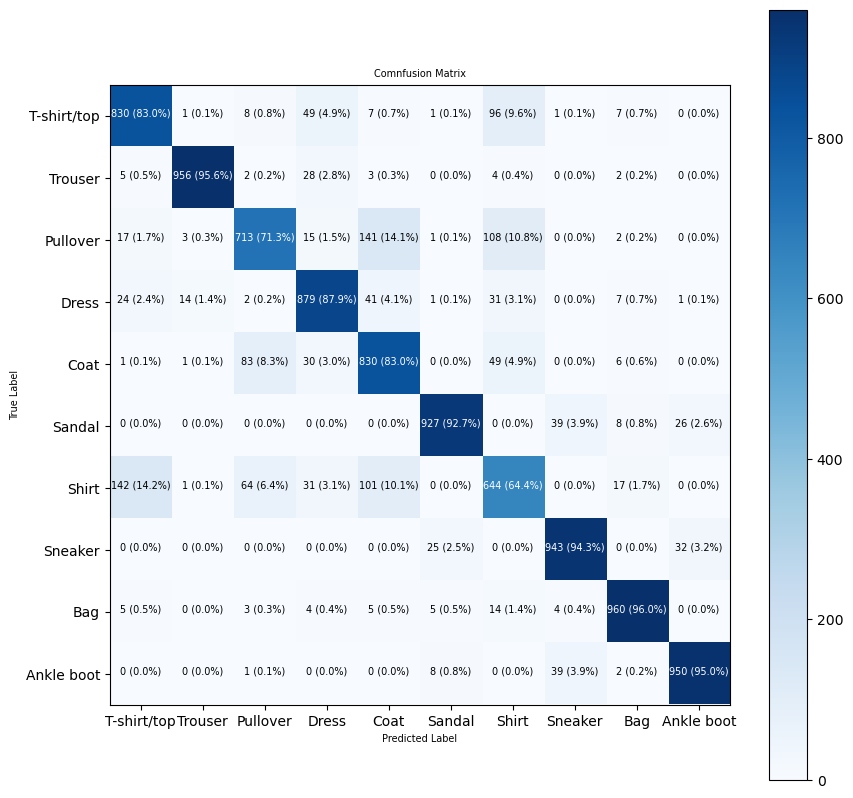

In [119]:
plot_confusion_matrix(test_labels,
                      tf.argmax(fashion_model_20.predict(tf.reshape(test_data_std, shape= test_data.shape)), axis= 1),
                      classes= class_names,
                      text_size= 7)

313/313 [==============================] - 0s 327us/step


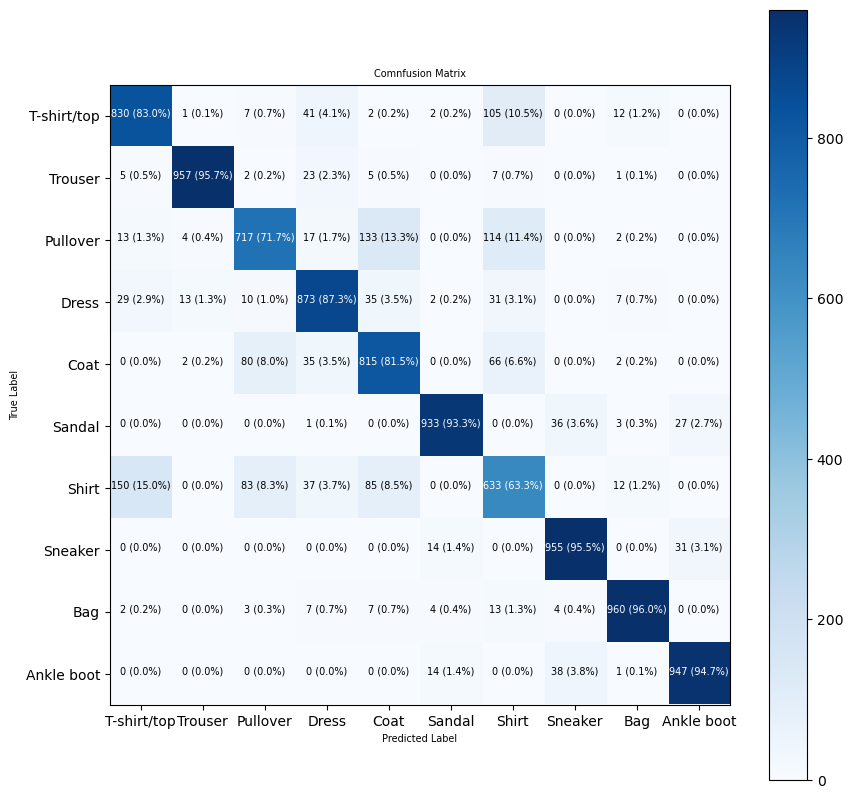

In [121]:
plot_confusion_matrix(test_labels,
                      tf.argmax(fashion_model_21.predict(tf.reshape(test_data_std, shape= test_data.shape)), axis= 1),
                      classes= class_names,
                      text_size= 7)

The issue of classifying Tshirt, Pullover and shirt has not been solved by Standard Scaler normalisation. Let's try with PCA.

In [150]:

def pca_experiment_1():

    for e in range (4, 29, 4):
        pca = PCA(n_components= e ** 2)
        train_data_pca = pca.fit_transform(tf.reshape(train_data_std, shape= (train_data.shape[0], 28 * 28)))
        test_data_pca = pca.transform(tf.reshape(test_data_std, shape= (test_data.shape[0], 28 * 28)))
        print(f"Number of components: {e ** 2}")

        tf.random.set_seed(42)
        learning_rate = 2e-4

        fashion_model_22 = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape= (e, e)),
            tf.keras.layers.Dense(10, activation= 'elu'),
            tf.keras.layers.Dense(50, activation= 'elu'),
            tf.keras.layers.Dense(100, activation= 'elu'),
            tf.keras.layers.Dense(100, activation= 'tanh'),
            tf.keras.layers.Dense(50, activation= 'tanh'),
            tf.keras.layers.Dense(len(class_names), activation= 'softmax')
        ])

        fashion_model_22.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                                optimizer= tf.keras.optimizers.Adam(learning_rate= learning_rate),
                                metrics= ['accuracy'])

        fashion_history_22 = fashion_model_22.fit(tf.reshape(train_data_pca, shape= (train_data.shape[0], e, e)), train_labels,
                                                epochs= 20,
                                                validation_data= (tf.reshape(test_data_pca, shape= (test_data.shape[0], e, e)), test_labels),
                                                verbose= 0)
        fashion_model_22.evaluate(tf.reshape(test_data_pca, shape= (test_data.shape[0], e, e)), test_labels)

In [151]:
pca_experiment_1()

Number of components: 16
313/313 [==============================] - 0s 338us/step - loss: 0.4619 - accuracy: 0.8233
Number of components: 64
313/313 [==============================] - 0s 345us/step - loss: 0.4001 - accuracy: 0.8527
Number of components: 144
313/313 [==============================] - 0s 339us/step - loss: 0.3782 - accuracy: 0.8627
Number of components: 256
313/313 [==============================] - 0s 354us/step - loss: 0.3877 - accuracy: 0.8621
Number of components: 400
313/313 [==============================] - 0s 344us/step - loss: 0.3862 - accuracy: 0.8624
Number of components: 576
313/313 [==============================] - 0s 346us/step - loss: 0.4069 - accuracy: 0.8584
Number of components: 784
313/313 [==============================] - 0s 360us/step - loss: 0.4127 - accuracy: 0.8619


In [152]:
def pca_experiment_2():

    for e in range (4, 29, 4):
        pca = PCA(n_components= e ** 2)
        train_data_pca = pca.fit_transform(tf.reshape(train_data_std, shape= (train_data.shape[0], 28 * 28)))
        test_data_pca = pca.transform(tf.reshape(test_data_std, shape= (test_data.shape[0], 28 * 28)))
        print(f"Number of components: {e ** 2}")

        tf.random.set_seed(42)
        learning_rate = 2e-4

        fashion_model_23 = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape= (e, e)),
            tf.keras.layers.Dense(10, activation= 'elu'),
            tf.keras.layers.Dense(50, activation= 'elu'),
            tf.keras.layers.Dense(100, activation= 'elu'),
            tf.keras.layers.Dense(100, activation= 'tanh'),
            tf.keras.layers.Dense(50, activation= 'tanh'),
            tf.keras.layers.Dense(5, activation= 'relu'),
            tf.keras.layers.Dense(len(class_names), activation= 'softmax')
        ])

        fashion_model_23.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
                                optimizer= tf.keras.optimizers.Adam(learning_rate= learning_rate),
                                metrics= ['accuracy'])

        fashion_history_23 = fashion_model_23.fit(tf.reshape(train_data_pca, shape= (train_data.shape[0], e, e)), train_labels,
                                                epochs= 20,
                                                validation_data= (tf.reshape(test_data_pca, shape= (test_data.shape[0], e, e)), test_labels),
                                                verbose= 0)
        fashion_model_23.evaluate(tf.reshape(test_data_pca, shape= (test_data.shape[0], e, e)), test_labels)

In [153]:
pca_experiment_2()

Number of components: 16
313/313 [==============================] - 0s 342us/step - loss: 0.4803 - accuracy: 0.8183
Number of components: 64
313/313 [==============================] - 0s 363us/step - loss: 0.4272 - accuracy: 0.8441
Number of components: 144
313/313 [==============================] - 0s 356us/step - loss: 0.4045 - accuracy: 0.8564
Number of components: 256
313/313 [==============================] - 0s 354us/step - loss: 0.4054 - accuracy: 0.8599
Number of components: 400
313/313 [==============================] - 0s 366us/step - loss: 0.4098 - accuracy: 0.8586
Number of components: 576
313/313 [==============================] - 0s 360us/step - loss: 0.4343 - accuracy: 0.8544
Number of components: 784
313/313 [==============================] - 0s 386us/step - loss: 0.4408 - accuracy: 0.8561


In [145]:
fashion_model_19.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 0s 358us/step - loss: 0.3909 - accuracy: 0.8627


[0.3909464478492737, 0.8626999855041504]

In [146]:
fashion_model_18.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 0s 384us/step - loss: 0.3767 - accuracy: 0.8668


[0.37669819593429565, 0.8668000102043152]